# Exploratory Data Analysis of Variables

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import pickle

In [2]:
train_data = pd.read_csv("data/train.csv")

In [3]:
train_data.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [5]:
train_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [6]:
test_data = pd.read_csv("data/test.csv")

In [7]:
test_data.columns

Index(['id', 'amount_tsh', 'date_recorded', 'funder', 'gps_height',
       'installer', 'longitude', 'latitude', 'wpt_name', 'num_private',
       'basin', 'subvillage', 'region', 'region_code', 'district_code', 'lga',
       'ward', 'population', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'construction_year',
       'extraction_type', 'extraction_type_group', 'extraction_type_class',
       'management', 'management_group', 'payment', 'payment_type',
       'water_quality', 'quality_group', 'quantity', 'quantity_group',
       'source', 'source_type', 'source_class', 'waterpoint_type',
       'waterpoint_type_group'],
      dtype='object')

In [8]:
train_label = pd.read_csv("data/train_label.csv")

In [9]:
train_label.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
id              59400 non-null int64
status_group    59400 non-null object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [10]:
def bar_plot(column_name):
    grouped = column_name.groupby(column_name).count()
    bar_df = grouped.to_frame()
    plt.figure(figsize=(20,10))
    plt.bar(bar_df.index, bar_df.iloc[:,0])

In [11]:
def histogram(column_name):
    plt.figure(figsize=(20,10))
    plt.hist(column_name)

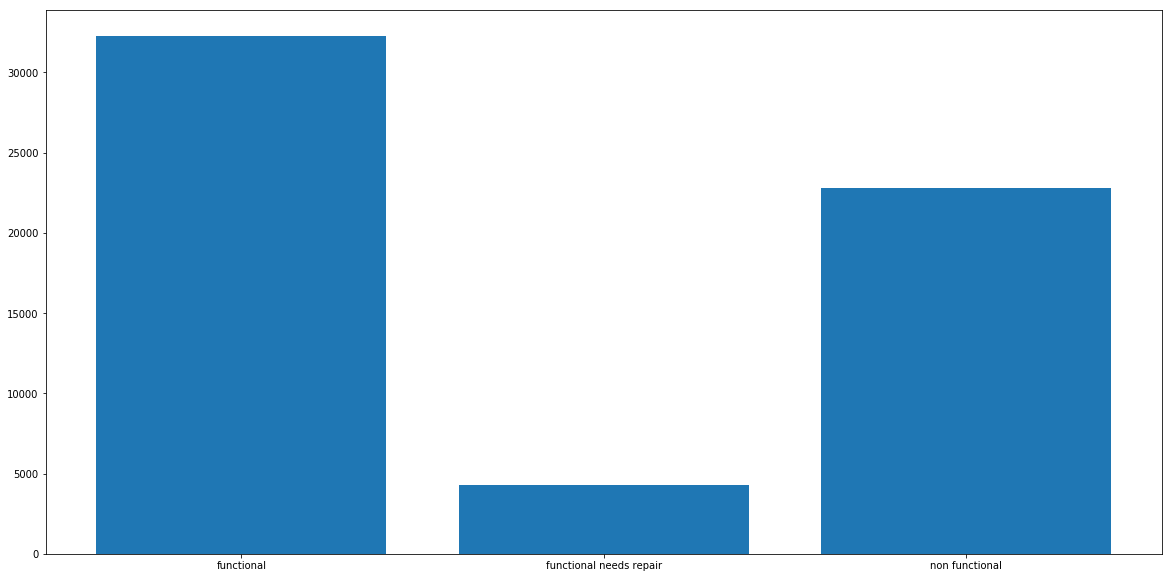

In [12]:
bar_plot(train_label.status_group)

#### Data dictionary

##### 1. - `id` - unique entry - no NA - good with train and test
##### 2. - `amount_tsh` - Total static head (amount water available to waterpoint)-  possible outliers (in both train and test)
#### 3. `date_recorded` - The date the row was entered
#### 4. `funder` - Who funded the well - contains na
##### 5. - `gps_height` - Altitude of the well - no outliers - not normal either - 0 - 500 a lot
##### 6. - `installer` - Organization that installed the well - contains na
##### 7. - `longitude` 
##### 8. - `latitude` 
##### 9. - `wpt_name` - Name of the waterpoint if there is one
##### 10. - `num_private` - possible outliers
##### 11. - `basin` - Geographic water basin - 9 unique
##### 12. - `subvillage` - Geographic location - combine and bin maybe
##### 13. - `region` - Geographic location - 21 unique
##### 14. - `region_code` - Geographic location (coded) - 27 unique 
##### 15. - `district_code` - Geographic location (coded)
##### 16. - `lga` - Geographic location
##### 17. - `ward` - Geographic location
##### 18. - `population` - Population around the well - possible outliers
##### 19. - `public_meeting` - True/False - contains NA
##### 20. - `recorded_by` - Group entering this row of data - nvz
##### 21. - scheme_management - Who operates the waterpoint - contains na - 12 unique
##### 22. - scheme_name - Who operates the waterpoint - contains NA - lot of unique - can be binned
##### 23. - permit - If the waterpoint is permitted - contains NA - can be imputed with majority class (TRUE)
##### 24. - construction_year - Year the waterpoint was constructed
##### 25. - extraction_type - The kind of extraction the waterpoint uses
##### 26. - extraction_type_group - The kind of extraction the waterpoint uses
##### 27. - extraction_type_class - The kind of extraction the waterpoint uses
##### 28. - management - How the waterpoint is managed
##### 29. - management_group - How the waterpoint is managed
##### 30. - payment - What the water costs
##### 31. - payment_type - What the water costs
##### 32. - water_quality - The quality of the water
##### 33. - quality_group - The quality of the water
##### 34. - quantity - The quantity of water
##### 35. - quantity_group - The quantity of water
##### 36. - source - The source of the water
##### 37. - source_type - The source of the water
##### 38. - source_class - The source of the water
##### 39. - waterpoint_type - The kind of waterpoint
##### 40. - waterpoint_type_group - The kind of waterpoint


#### Numerical features

amount_tsh, gps_height, 

#### Categorical features

#### Spatial features

longitude, latitude, subvillage, region, region_code, district_code, lga, ward

#### Temporal features

date_recorded

#### Baseline model - columns

###### Same as it is - amount_tsh, gps_height, num_private, population
###### dummy - status_group, basin, region, district_code

## First 10 variables - EDA

In [13]:
train_data.iloc[:, 0:10].describe(include = 'all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private
count,59400.000000,59400.000000,59400,55765,59400.000000,55745,59400.000000,5.940000e+04,59400,59400.000000
unique,NaN,NaN,356,1897,NaN,2145,NaN,NaN,37400,NaN
top,NaN,NaN,2011-03-15,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN
freq,NaN,NaN,572,9084,NaN,17402,NaN,NaN,3563,NaN
mean,37115.131768,317.650385,NaN,NaN,668.297239,NaN,34.077427,-5.706033e+00,NaN,0.474141
std,21453.128371,2997.574558,NaN,NaN,693.116350,NaN,6.567432,2.946019e+00,NaN,12.236230
min,0.000000,0.000000,NaN,NaN,-90.000000,NaN,0.000000,-1.164944e+01,NaN,0.000000
25%,18519.750000,0.000000,NaN,NaN,0.000000,NaN,33.090347,-8.540621e+00,NaN,0.000000
50%,37061.500000,0.000000,NaN,NaN,369.000000,NaN,34.908743,-5.021597e+00,NaN,0.000000
75%,55656.500000,20.000000,NaN,NaN,1319.250000,NaN,37.178387,-3.326156e+00,NaN,0.000000


In [14]:
test_data.iloc[:, 0:10].describe(include = 'all')

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private
count,14850.000000,14850.000000,14850,13981,14850.000000,13973,14850.000000,1.485000e+04,14850,14850.000000
unique,NaN,NaN,331,980,NaN,1091,NaN,NaN,10840,NaN
top,NaN,NaN,2013-02-03,Government Of Tanzania,NaN,DWE,NaN,NaN,none,NaN
freq,NaN,NaN,138,2215,NaN,4349,NaN,NaN,877,NaN
mean,37161.972929,322.826983,NaN,NaN,655.147609,NaN,34.061605,-5.684724e+00,NaN,0.415084
std,21359.364833,2510.968644,NaN,NaN,691.261185,NaN,6.593034,2.940803e+00,NaN,8.167910
min,10.000000,0.000000,NaN,NaN,-57.000000,NaN,0.000000,-1.156459e+01,NaN,0.000000
25%,18727.000000,0.000000,NaN,NaN,0.000000,NaN,33.069455,-8.443970e+00,NaN,0.000000
50%,37361.500000,0.000000,NaN,NaN,344.000000,NaN,34.901215,-5.049750e+00,NaN,0.000000
75%,55799.750000,25.000000,NaN,NaN,1308.000000,NaN,37.196594,-3.320594e+00,NaN,0.000000


#### `amount_tsh`

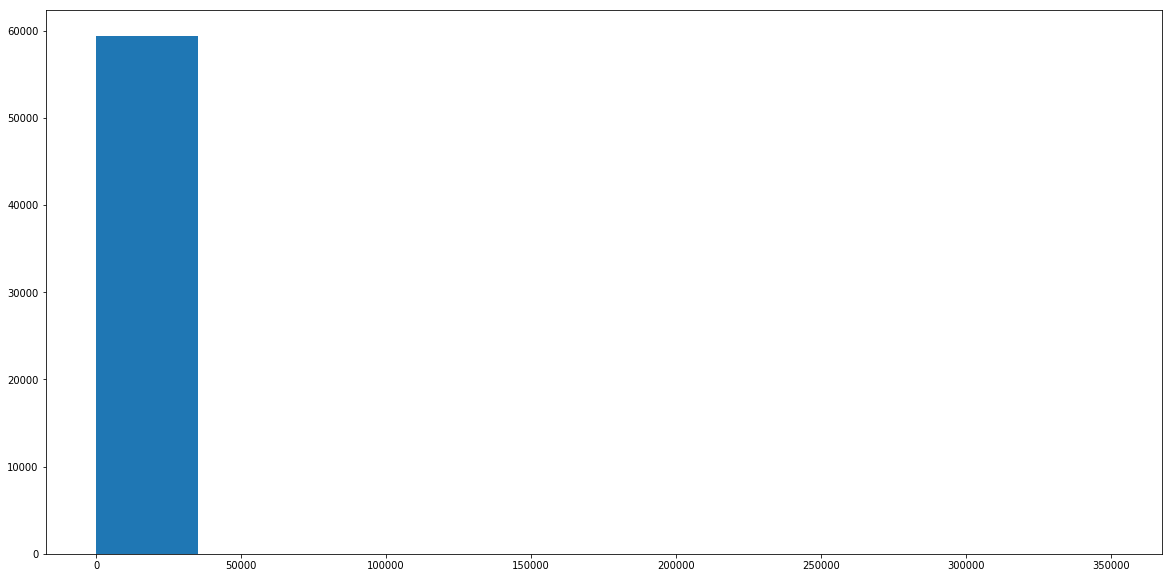

In [15]:
histogram(train_data['amount_tsh'])

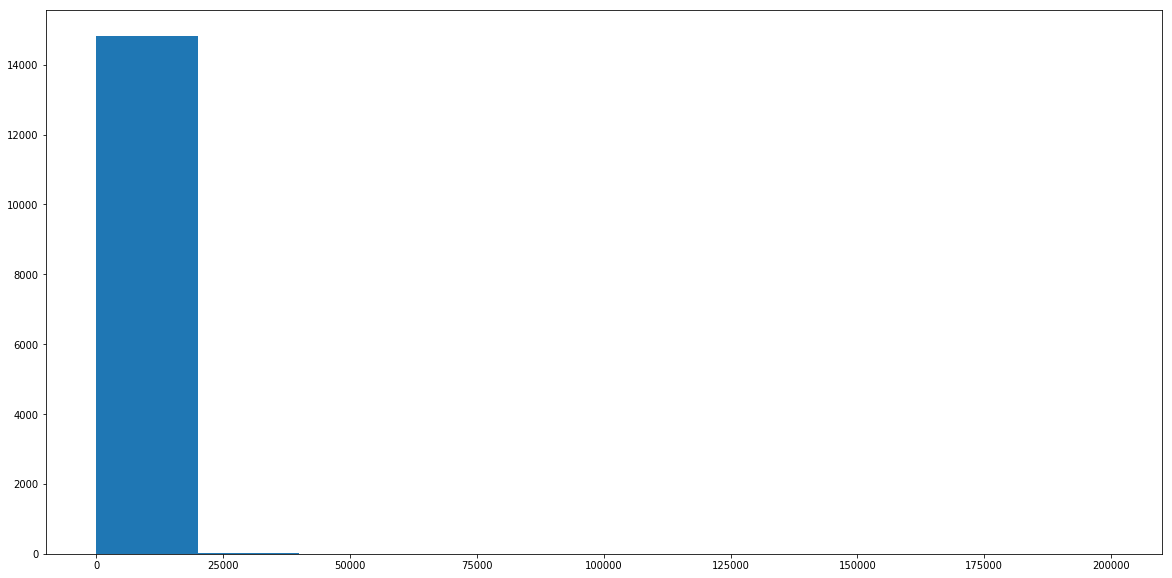

In [16]:
histogram(test_data['amount_tsh'])

### `date_recorded`

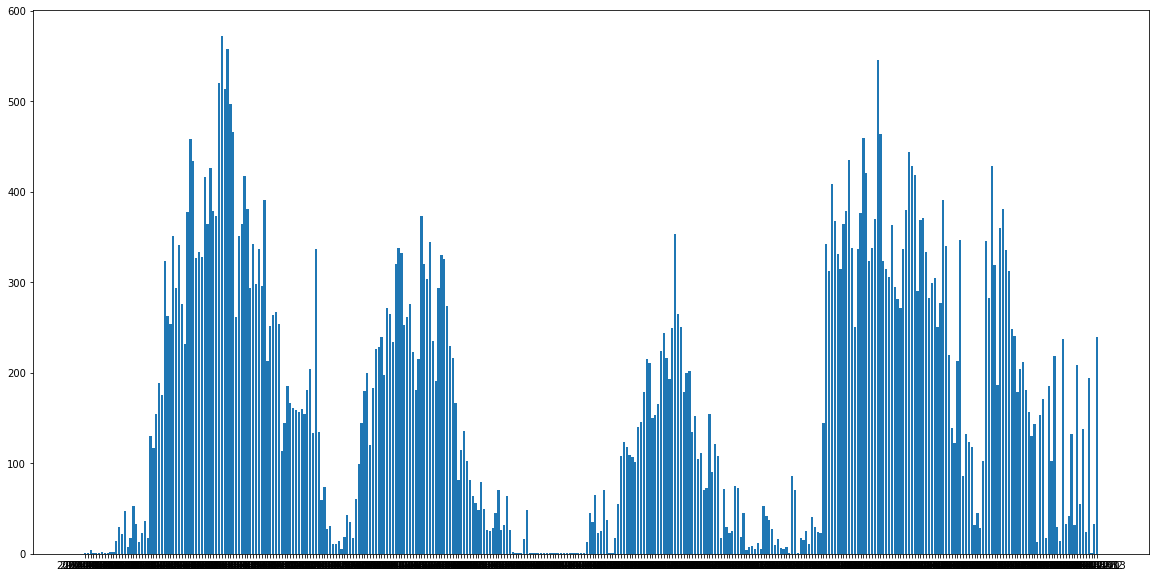

In [17]:
bar_plot(train_data.date_recorded)

### `funder`

In [18]:
train_data.funder.value_counts()

Government Of Tanzania      9084
Danida                      3114
Hesawa                      2202
Rwssp                       1374
World Bank                  1349
Kkkt                        1287
World Vision                1246
Unicef                      1057
Tasaf                        877
District Council             843
Dhv                          829
Private Individual           826
Dwsp                         811
0                            777
Norad                        765
Germany Republi              610
Tcrs                         602
Ministry Of Water            590
Water                        583
Dwe                          484
Netherlands                  470
Hifab                        450
Adb                          448
Lga                          442
Amref                        425
Fini Water                   393
Oxfam                        359
Wateraid                     333
Rc Church                    321
Isf                          316
          

In [19]:
test_data.funder.value_counts()

Government Of Tanzania     2215
Danida                      793
Hesawa                      580
World Bank                  352
Kkkt                        336
Rwssp                       329
World Vision                316
Unicef                      267
Tasaf                       259
Dhv                         236
Private Individual          208
0                           203
Dwsp                        201
District Council            194
Norad                       184
Water                       156
Germany Republi             155
Ministry Of Water           138
Tcrs                        133
Hifab                       127
Netherlands                 122
Dwe                         121
Lga                         104
Adb                         103
Amref                       100
Rc Church                    89
Private                      85
Wateraid                     83
Fini Water                   81
Mission                      78
                           ... 
Tanroad 

### `gps_height`

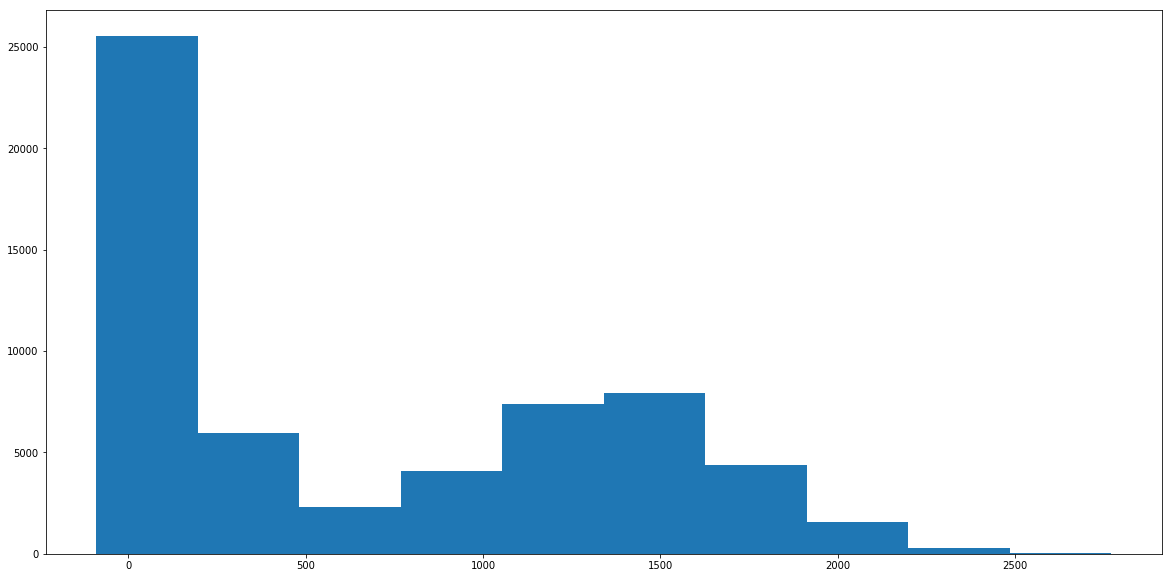

In [20]:
histogram(train_data['gps_height'])

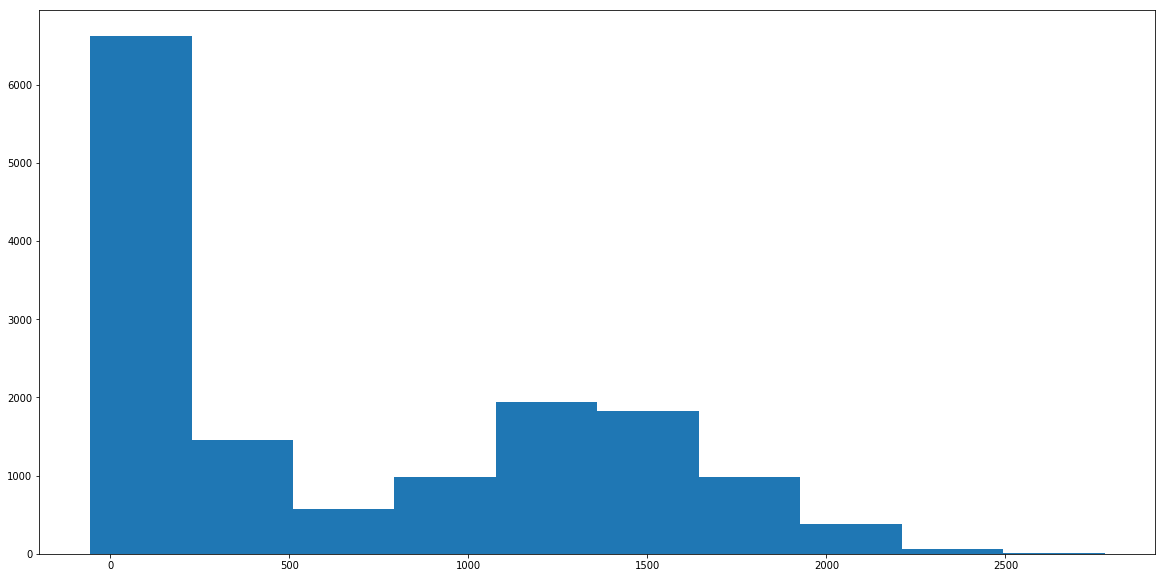

In [21]:
histogram(test_data['gps_height'])

### `installer`

In [22]:
train_data.installer.value_counts()

DWE                             17402
Government                       1825
RWE                              1206
Commu                            1060
DANIDA                           1050
KKKT                              898
Hesawa                            840
0                                 777
TCRS                              707
Central government                622
CES                               610
Community                         553
DANID                             552
District Council                  551
HESAWA                            539
World vision                      408
LGA                               408
WEDECO                            397
TASAF                             396
District council                  392
Gover                             383
AMREF                             329
TWESA                             316
WU                                301
Dmdd                              287
ACRA                              278
World Vision

In [23]:
test_data.installer.value_counts()

DWE                    4349
Government              457
RWE                     292
Commu                   287
DANIDA                  255
Hesawa                  230
KKKT                    222
0                       203
TCRS                    180
CES                     155
Central government      142
HESAWA                  140
DANID                   138
Community               134
District Council        112
World vision            109
TASAF                   108
Gover                   100
WEDECO                   99
District council         98
LGA                      93
TWESA                    79
WU                       76
Dmdd                     69
AMREF                    69
ACRA                     68
Da                       63
UNICEF                   63
Villagers                63
SEMA                     62
                       ... 
MoWI                      1
Childreach                1
Lions                     1
mwakipesile               1
Umfaiswary          

### `num_private`

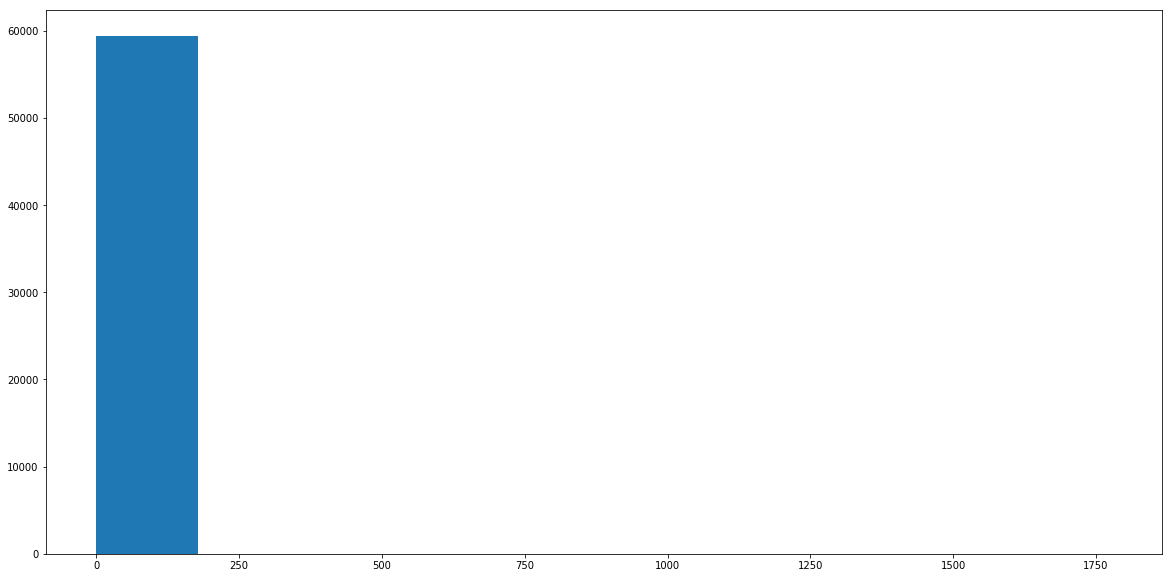

In [24]:
histogram(train_data['num_private'])

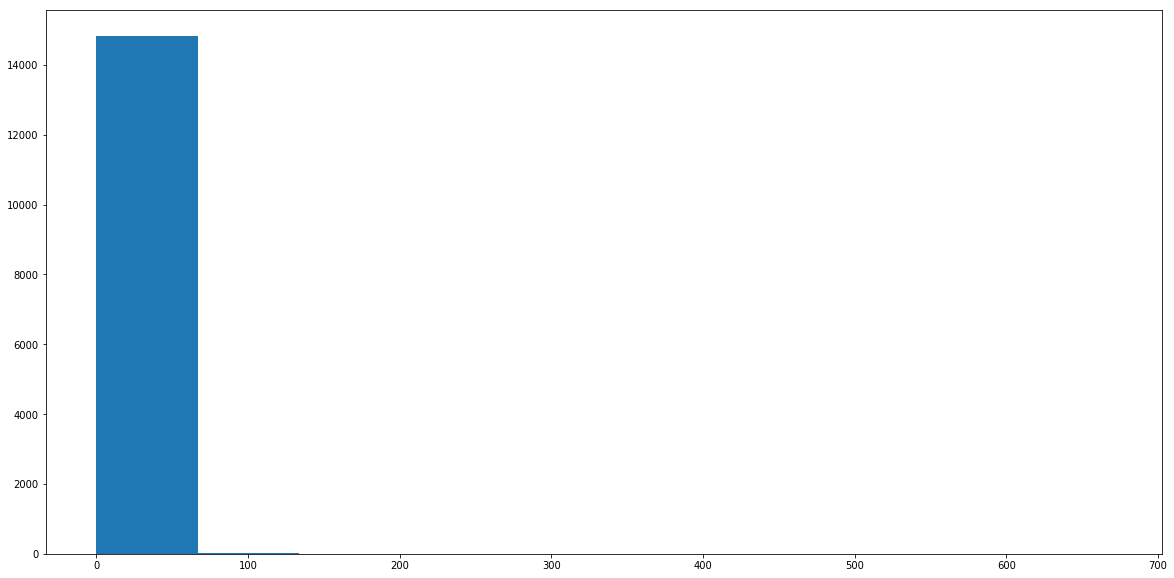

In [25]:
histogram(test_data['num_private'])

## 11 - 20 variables - EDA

In [26]:
train_data.iloc[:, 10:20].describe(include = 'all')

,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
count,59400,59029,59400,59400.000000,59400.000000,59400,59400,59400.000000,56066,59400
unique,9,19287,21,NaN,NaN,125,2092,NaN,2,1
top,Lake Victoria,Madukani,Iringa,NaN,NaN,Njombe,Igosi,NaN,True,GeoData Consultants Ltd
freq,10248,508,5294,NaN,NaN,2503,307,NaN,51011,59400
mean,NaN,NaN,NaN,15.297003,5.629747,NaN,NaN,179.909983,NaN,NaN
std,NaN,NaN,NaN,17.587406,9.633649,NaN,NaN,471.482176,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,5.000000,2.000000,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,12.000000,3.000000,NaN,NaN,25.000000,NaN,NaN
75%,NaN,NaN,NaN,17.000000,5.000000,NaN,NaN,215.000000,NaN,NaN


In [27]:
test_data.iloc[:, 10:20].describe(include = 'all')

,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by
count,14850,14751,14850,14850.000000,14850.000000,14850,14850,14850.000000,14029,14850
unique,9,8443,21,NaN,NaN,125,1959,NaN,2,1
top,Lake Victoria,Shuleni,Shinyanga,NaN,NaN,Njombe,Igosi,NaN,True,GeoData Consultants Ltd
freq,2623,140,1311,NaN,NaN,625,79,NaN,12738,14850
mean,NaN,NaN,NaN,15.139057,5.626397,NaN,NaN,184.114209,NaN,NaN
std,NaN,NaN,NaN,17.191329,9.673842,NaN,NaN,469.499332,NaN,NaN
min,NaN,NaN,NaN,1.000000,0.000000,NaN,NaN,0.000000,NaN,NaN
25%,NaN,NaN,NaN,5.000000,2.000000,NaN,NaN,0.000000,NaN,NaN
50%,NaN,NaN,NaN,12.000000,3.000000,NaN,NaN,20.000000,NaN,NaN
75%,NaN,NaN,NaN,17.000000,5.000000,NaN,NaN,220.000000,NaN,NaN


### `basin`

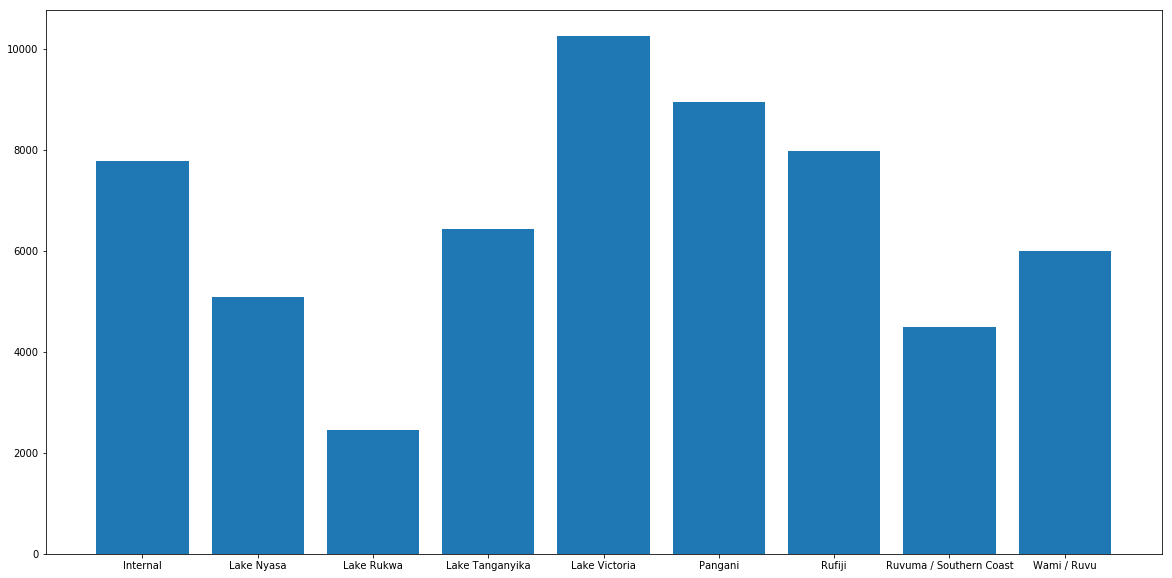

In [28]:
bar_plot(train_data.basin)

In [29]:
train_data.basin.value_counts()

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64

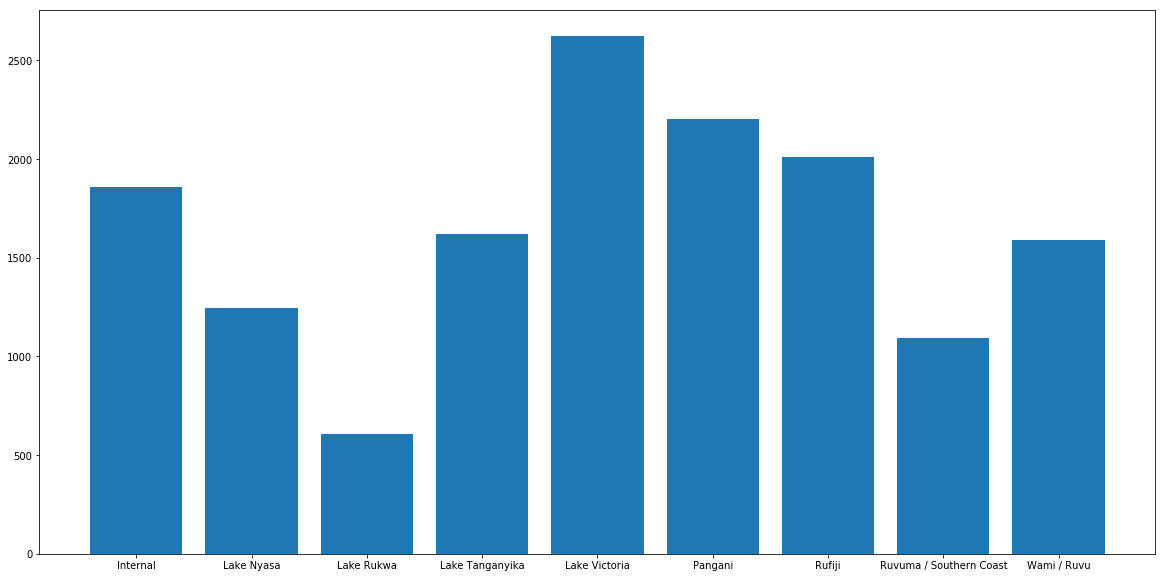

In [30]:
bar_plot(test_data.basin)

In [31]:
test_data.basin.value_counts()

Lake Victoria              2623
Pangani                    2203
Rufiji                     2011
Internal                   1857
Lake Tanganyika            1620
Wami / Ruvu                1590
Lake Nyasa                 1247
Ruvuma / Southern Coast    1094
Lake Rukwa                  605
Name: basin, dtype: int64

### `subvillage`

In [32]:
train_data.subvillage.value_counts()

Madukani          508
Shuleni           506
Majengo           502
Kati              373
Mtakuja           262
Sokoni            232
M                 187
Muungano          172
Mbuyuni           164
Mlimani           152
Songambele        147
Miembeni          134
Msikitini         134
1                 132
Kibaoni           114
Kanisani          111
I                 109
Mapinduzi         109
Mjimwema          108
Mjini             108
Mkwajuni          104
Mwenge            102
Mabatini           98
Azimio             98
Mission            95
Mbugani            95
Bwawani            91
Bondeni            90
Chang'Ombe         88
Zahanati           86
                 ... 
Mwayani             1
Kakondo             1
Tafula              1
Nijanija            1
Badagi              1
Birubiru            1
Ndomboka            1
Moterugali          1
Bugatu              1
Mwalulushi          1
Gwanumpu            1
Maparakata          1
Ngutu               1
Kisamuni            1
Milambo Ce

In [33]:
test_data.subvillage.value_counts()

Shuleni                 140
Majengo                 129
Madukani                121
Kati                     94
Sokoni                   62
Mtakuja                  60
M                        56
Songambele               47
Mbuyuni                  46
Muungano                 43
Amani                    38
Mlimani                  38
Kanisani                 35
Miembeni                 34
Bondeni                  31
Msikitini                30
Kibaoni                  29
Senta                    27
Kichangani               26
1                        25
Mtaa Wa Kitunda Kati     24
Nyerere                  24
Mjini                    23
Mwenge                   23
Kisiwani                 22
Mtaa Wa Kivule           21
Mjimwema                 21
Mkwajuni                 21
Msumbiji                 21
Chang'Ombe               20
                       ... 
Ndoivo                    1
Namba Moja                1
Ngurumani                 1
Ilungu                    1
Bung'Ang'A          

### `region`

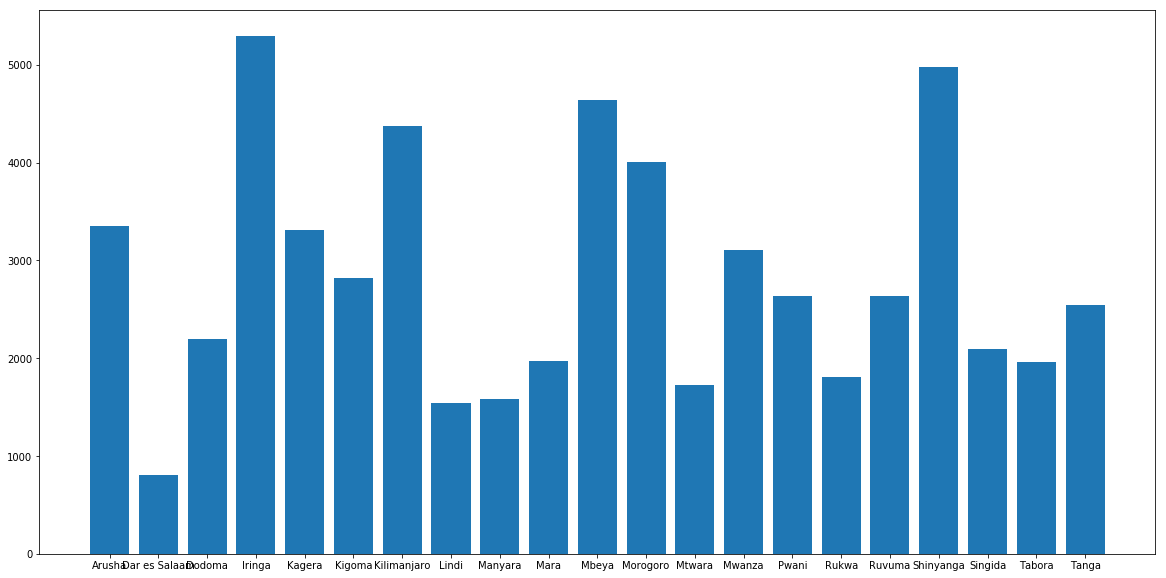

In [34]:
bar_plot(train_data.region)

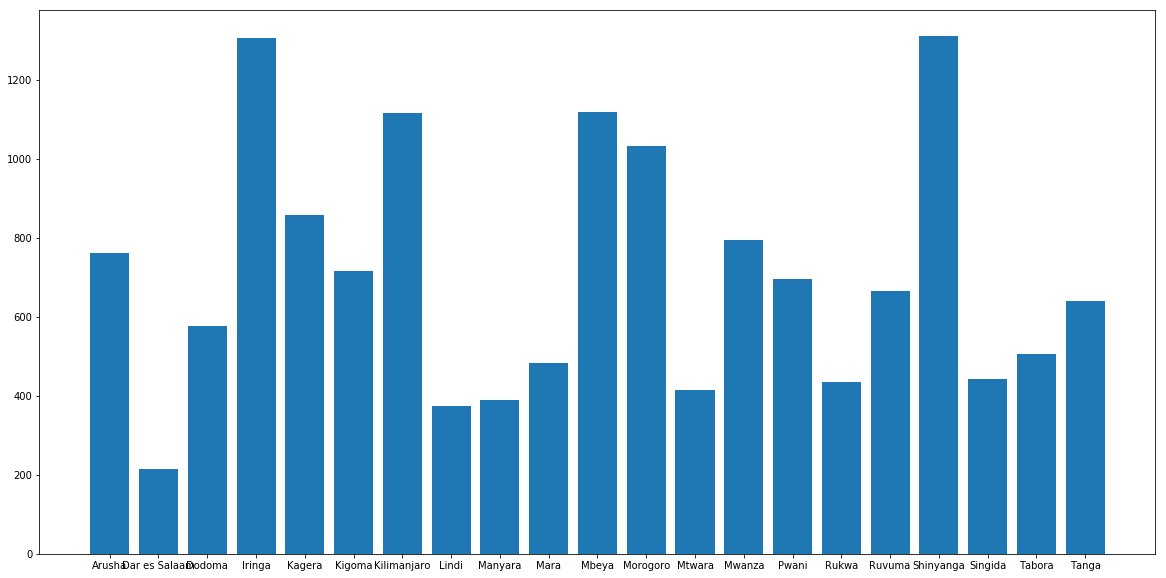

In [35]:
bar_plot(test_data.region)

In [36]:
train_data.region.nunique()

21

### `region_code`

In [37]:
train_data.region_code.value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

In [38]:
train_data.region_code.nunique()

27

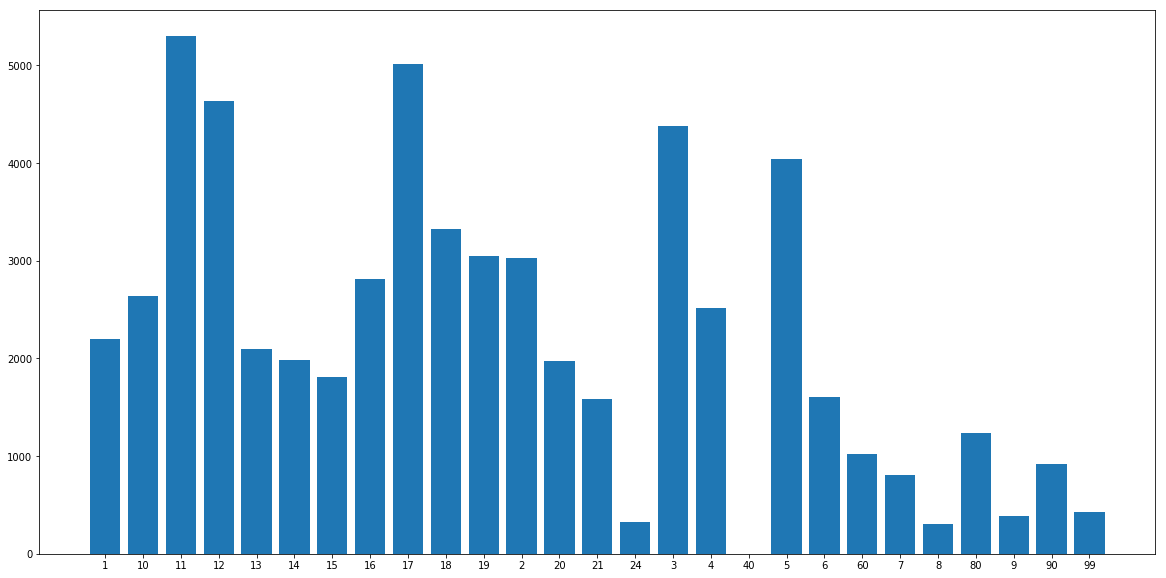

In [39]:
bar_plot(train_data.region_code.apply(str))

In [40]:
test_data.region_code.nunique()

26

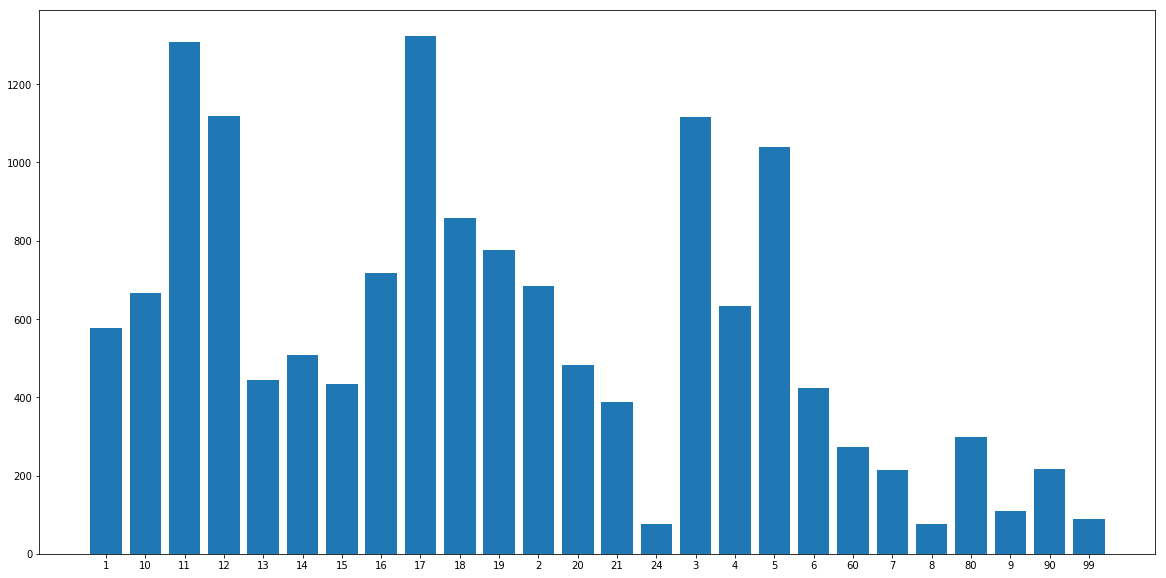

In [41]:
bar_plot(test_data.region_code.apply(str))

### `district_code`

In [42]:
train_data.district_code.value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

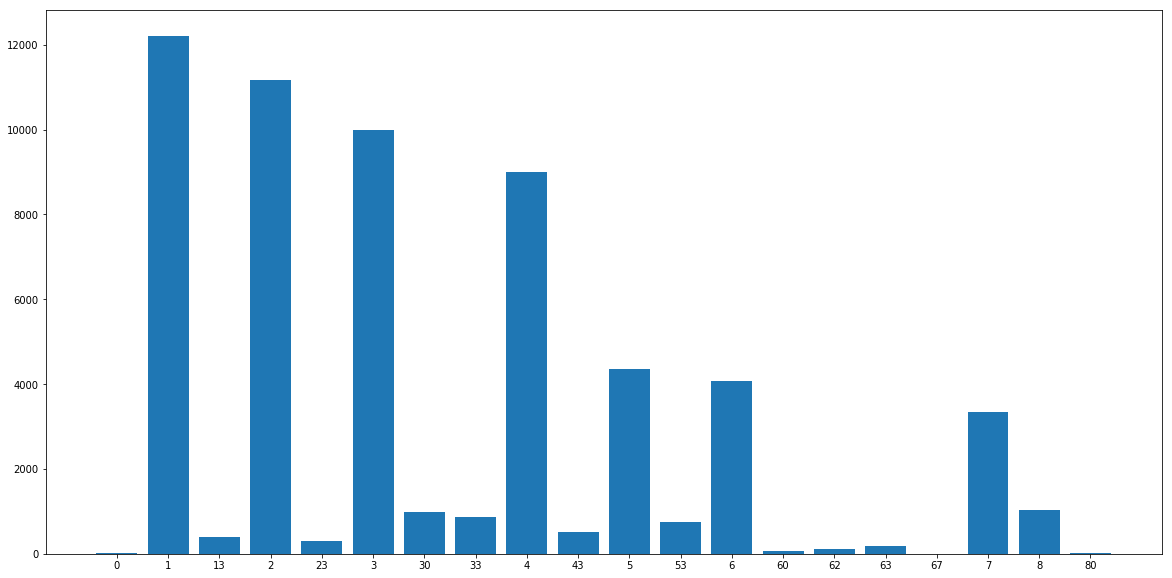

In [43]:
bar_plot(train_data.district_code.apply(str))

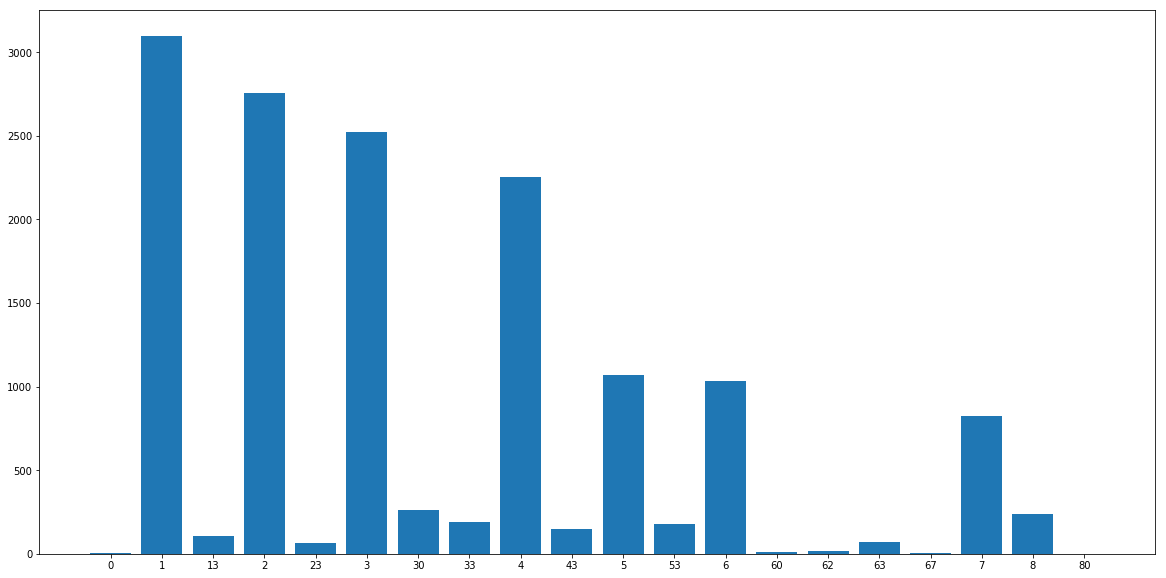

In [44]:
bar_plot(test_data.district_code.apply(str))

In [45]:
train_data.district_code.nunique()

20

In [46]:
test_data.district_code.nunique()

20

### `lga`

In [47]:
train_data.lga.value_counts()

Njombe              2503
Arusha Rural        1252
Moshi Rural         1251
Bariadi             1177
Rungwe              1106
Kilosa              1094
Kasulu              1047
Mbozi               1034
Meru                1009
Bagamoyo             997
Singida Rural        995
Kilombero            959
Same                 877
Kibondo              874
Kyela                859
Kahama               836
Magu                 824
Kigoma Rural         824
Maswa                809
Karagwe              771
Mbinga               750
Iringa Rural         728
Serengeti            716
Lushoto              694
Namtumbo             694
Songea Rural         693
Mpanda               679
Mvomero              671
Ngara                669
Ulanga               665
                    ... 
Ileje                231
Bahi                 224
Kisarawe             223
Temeke               215
Rorya                210
Tarime               209
Ngorongoro           201
Kiteto               193
Shinyanga Urban      191


### `ward`

In [48]:
train_data.ward.nunique()

2092

In [49]:
test_data.ward.nunique()

1959

### `population`

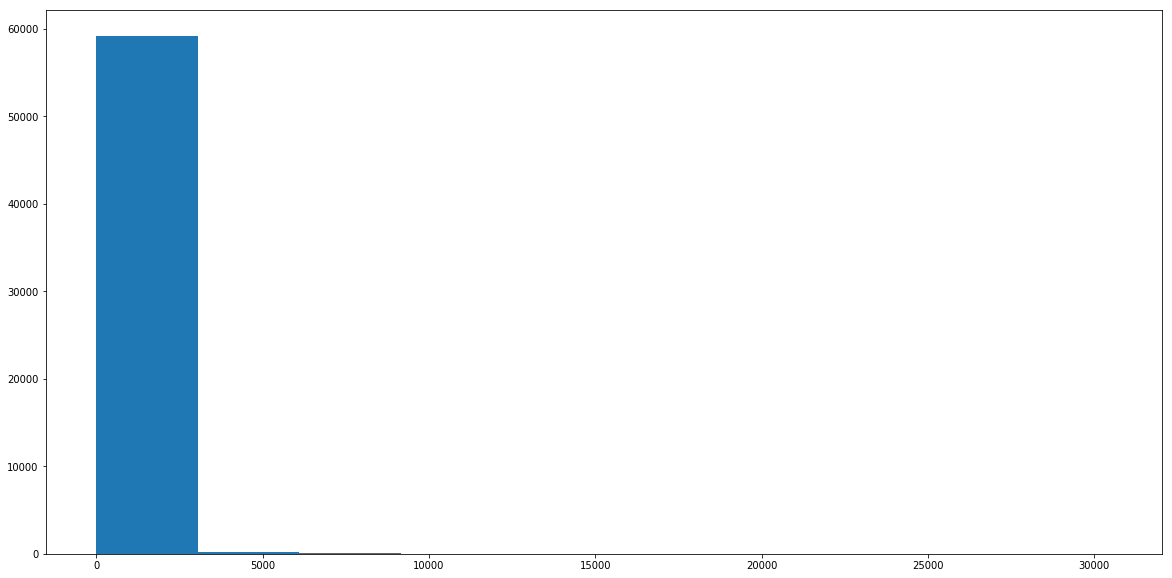

In [50]:
histogram(train_data['population'])

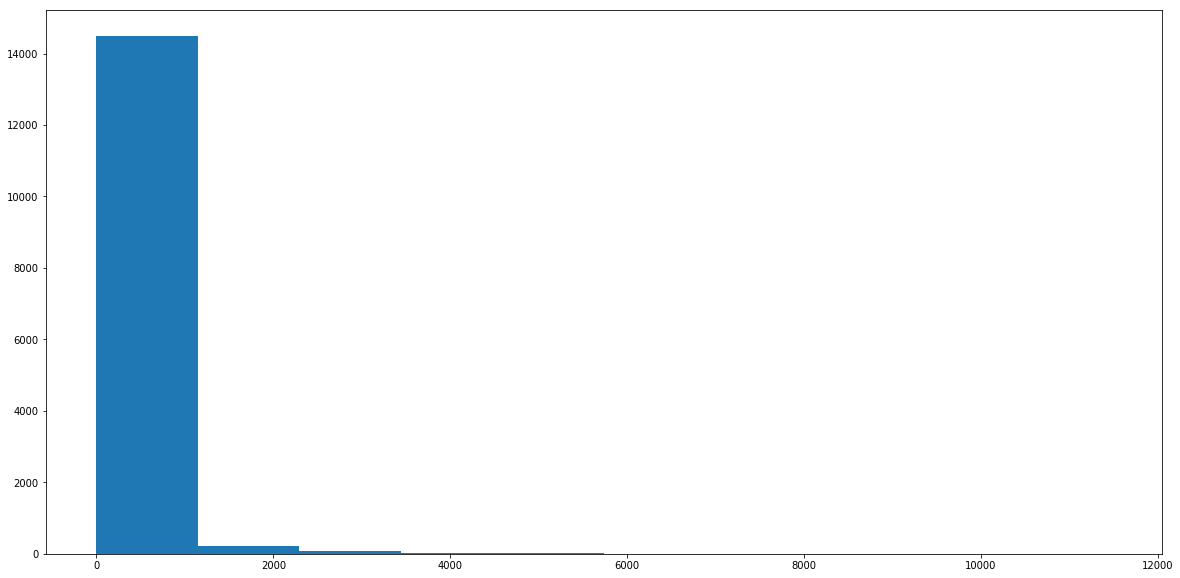

In [51]:
histogram(test_data['population'])

### `public_meeting`

In [52]:
train_data['public_meeting'].isnull().value_counts()

False    56066
True      3334
Name: public_meeting, dtype: int64

In [53]:
test_data['public_meeting'].isnull().value_counts()

False    14029
True       821
Name: public_meeting, dtype: int64

In [54]:
train_data['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [55]:
test_data['public_meeting'].value_counts()

True     12738
False     1291
Name: public_meeting, dtype: int64

### `recorded_by`

In [56]:
train_data.recorded_by.value_counts()

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64

In [57]:
test_data.recorded_by.value_counts()

GeoData Consultants Ltd    14850
Name: recorded_by, dtype: int64

## 21-30 variables - EDA

In [58]:
train_data.iloc[:, 20:30].describe(include = 'all')

,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment
count,55523,31234,56344,59400.000000,59400,59400,59400,59400,59400,59400
unique,12,2696,2,NaN,18,13,7,12,5,7
top,VWC,K,True,NaN,gravity,gravity,gravity,vwc,user-group,never pay
freq,36793,682,38852,NaN,26780,26780,26780,40507,52490,25348
mean,NaN,NaN,NaN,1300.652475,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,951.620547,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
test_data.iloc[:, 20:30].describe(include = 'all')

,scheme_management,scheme_name,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment
count,13881,7758,14113,14850.000000,14850,14850,14850,14850,14850,14850
unique,11,1789,2,NaN,17,13,7,12,5,7
top,VWC,K,True,NaN,gravity,gravity,gravity,vwc,user-group,never pay
freq,9124,176,9754,NaN,6483,6483,6483,10117,13048,6364
mean,NaN,NaN,NaN,1289.708350,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,NaN,955.241087,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,NaN,1986.000000,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,NaN


### `schema_management`

In [60]:
train_data.scheme_management.value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [61]:
train_data.scheme_management.isnull().value_counts()

False    55523
True      3877
Name: scheme_management, dtype: int64

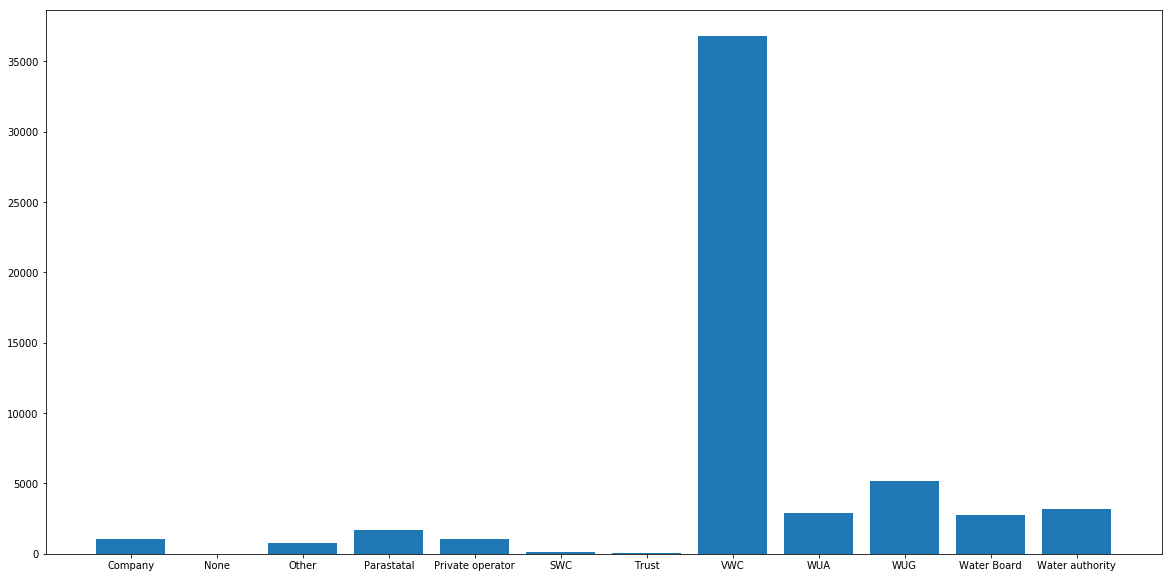

In [62]:
bar_plot(train_data.scheme_management)

In [63]:
test_data.scheme_management.isnull().value_counts()

False    13881
True       969
Name: scheme_management, dtype: int64

In [64]:
test_data.scheme_management.value_counts()

VWC                 9124
WUG                 1290
Water authority      822
Water Board          714
WUA                  668
Parastatal           444
Company              280
Private operator     263
Other                230
SWC                   26
Trust                 20
Name: scheme_management, dtype: int64

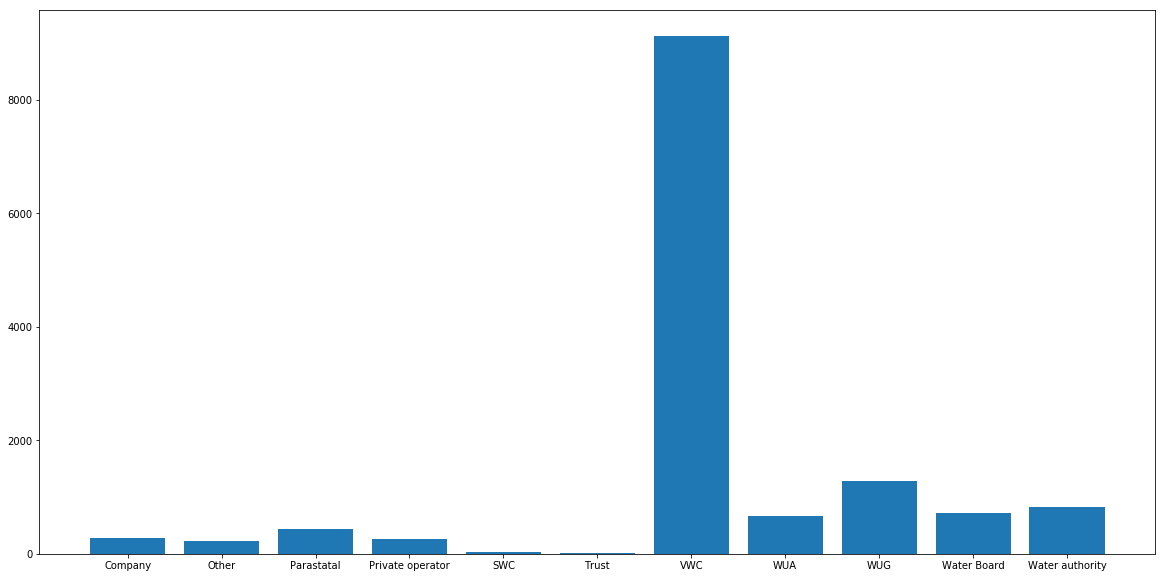

In [65]:
bar_plot(test_data.scheme_management)

### `permit`

In [66]:
train_data.permit.value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [67]:
train_data.permit.isnull().value_counts()

False    56344
True      3056
Name: permit, dtype: int64

In [68]:
test_data.permit.value_counts()

True     9754
False    4359
Name: permit, dtype: int64

In [69]:
test_data.permit.isnull().value_counts()

False    14113
True       737
Name: permit, dtype: int64

### `construction_year`

In [70]:
train_data.construction_year.value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [71]:
test_data.construction_year.value_counts()

0       5260
2010     669
2009     663
2008     630
2000     487
2006     421
2007     373
2011     335
2004     294
2003     293
1995     269
2002     268
2005     264
2012     263
1999     243
1985     232
1978     230
1998     224
1990     222
1996     209
1994     202
1980     194
1984     191
1972     184
1982     182
1997     177
1992     167
2001     140
1974     138
1993     137
1988     136
1975     124
1986     119
1976     111
1983     106
1991      83
1970      82
1989      80
1987      68
1981      53
1979      53
1977      45
1973      43
2013      33
1971      32
1963      22
1960      22
1969      18
1967      18
1968      16
1964       8
1961       7
1962       6
1966       2
1965       2
Name: construction_year, dtype: int64

In [72]:
train_data.construction_year.nunique()

55

In [73]:
test_data.construction_year.nunique()

55

## `extraction_type`

In [74]:
train_data.extraction_type.nunique()

18

In [75]:
test_data.extraction_type.nunique()

17

In [76]:
train_data.extraction_type.value_counts()

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64

In [77]:
test_data.extraction_type.value_counts()

gravity              6483
nira/tanira          2051
other                1672
submersible          1218
swn 80                918
mono                  763
india mark ii         629
afridev               438
ksb                   375
other - rope pump     121
other - swn 81         55
india mark iii         37
windmill               35
cemo                   18
other - play pump      16
walimi                 12
climax                  9
Name: extraction_type, dtype: int64

### `extraction_type_group`

In [79]:
train_data.extraction_type_group.value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [80]:
test_data.extraction_type_group.value_counts()

gravity            6483
nira/tanira        2051
other              1672
submersible        1593
swn 80              918
mono                763
india mark ii       629
afridev             438
rope pump           121
other handpump       83
india mark iii       37
wind-powered         35
other motorpump      27
Name: extraction_type_group, dtype: int64

In [81]:
train_data.extraction_type_group.nunique()

13

In [82]:
test_data.extraction_type_group.nunique()

13

### `extraction_type_class`

In [83]:
train_data.extraction_type_class.value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [84]:
test_data.extraction_type_class.value_counts()

gravity         6483
handpump        4156
other           1672
submersible     1593
motorpump        790
rope pump        121
wind-powered      35
Name: extraction_type_class, dtype: int64

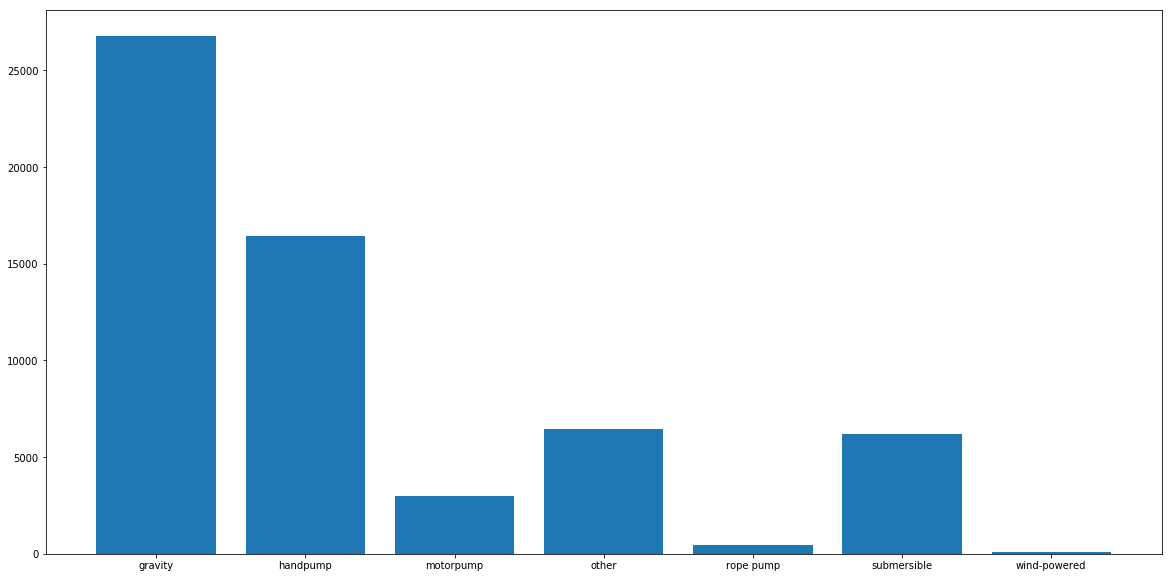

In [85]:
bar_plot(train_data.extraction_type_class)

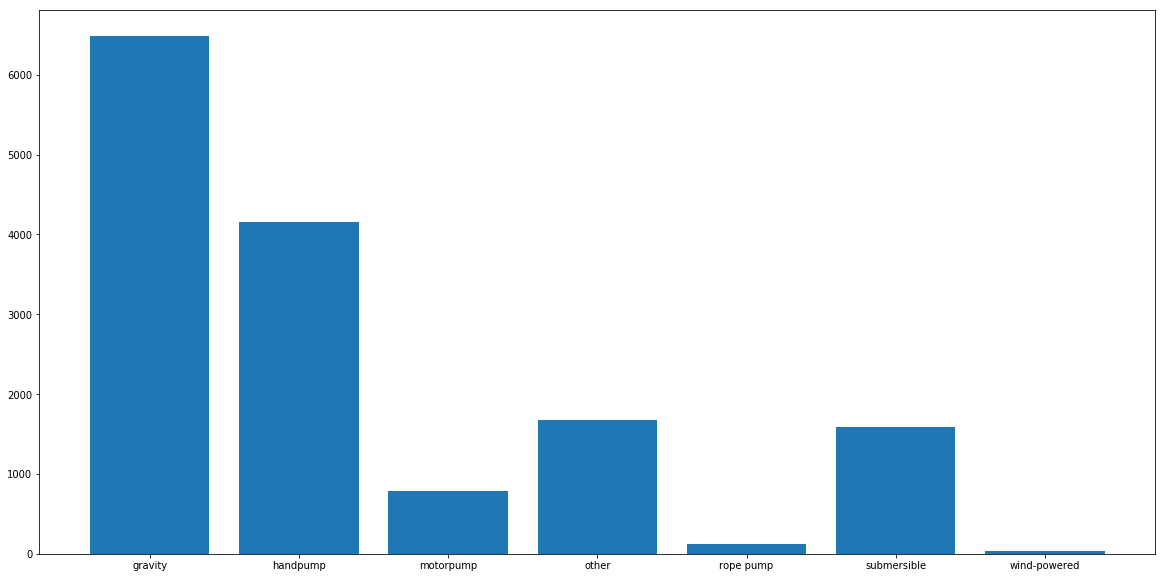

In [86]:
bar_plot(test_data.extraction_type_class)

### `management`

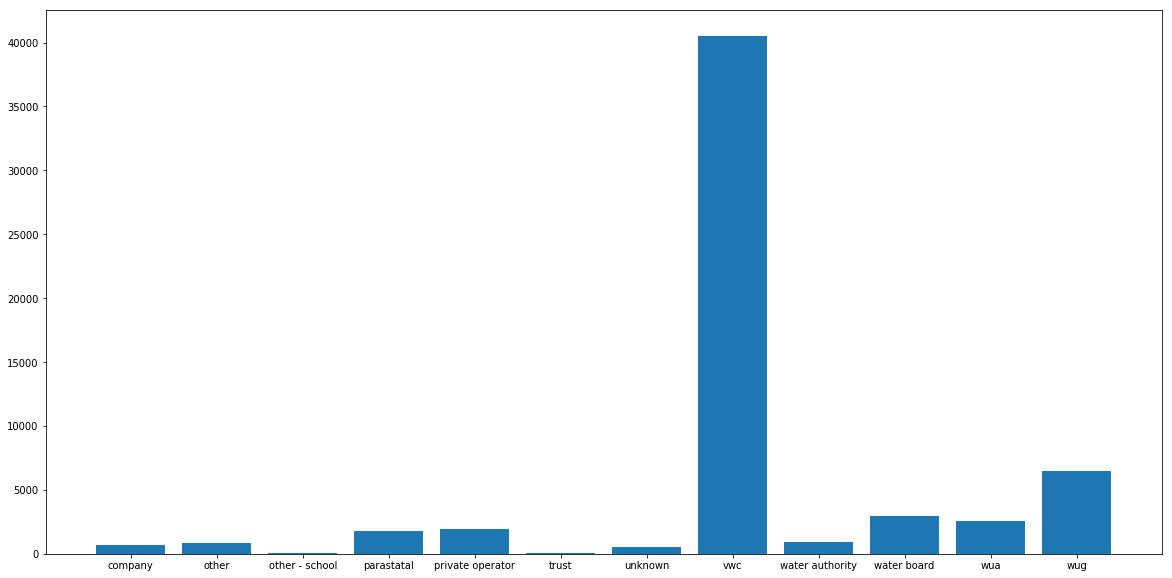

In [87]:
bar_plot(train_data.management)

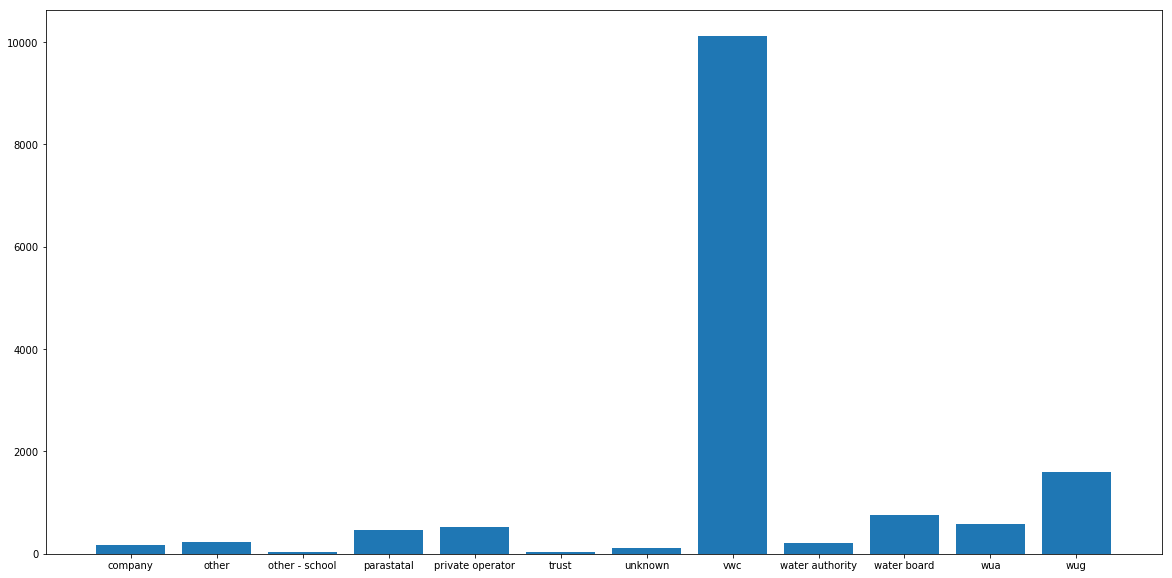

In [88]:
bar_plot(test_data.management)

### `management_group`

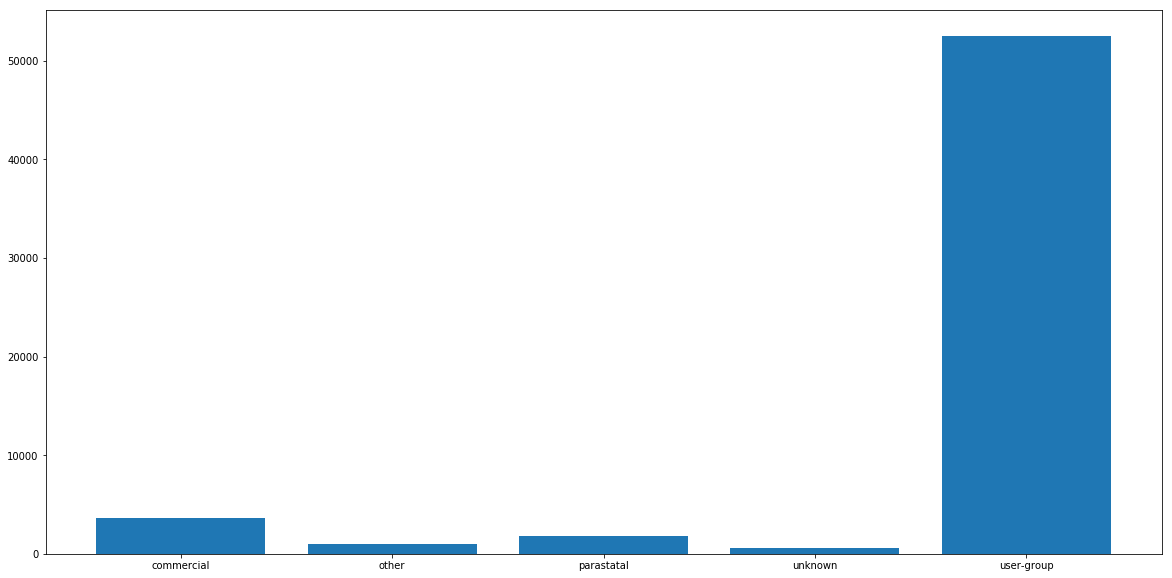

In [89]:
bar_plot(train_data.management_group)

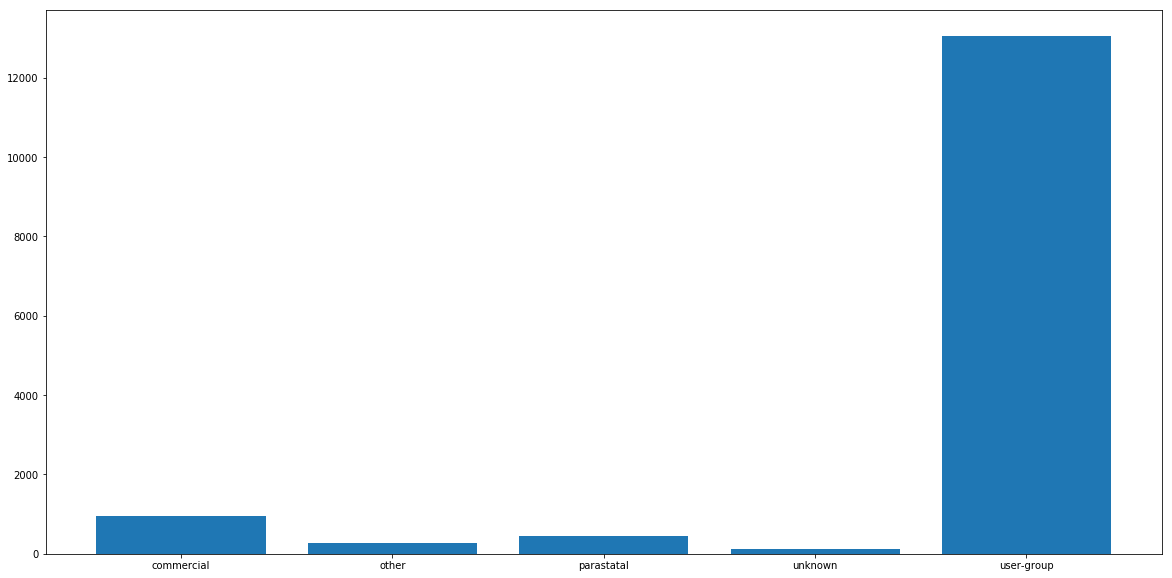

In [90]:
bar_plot(test_data.management_group)

### `payment`

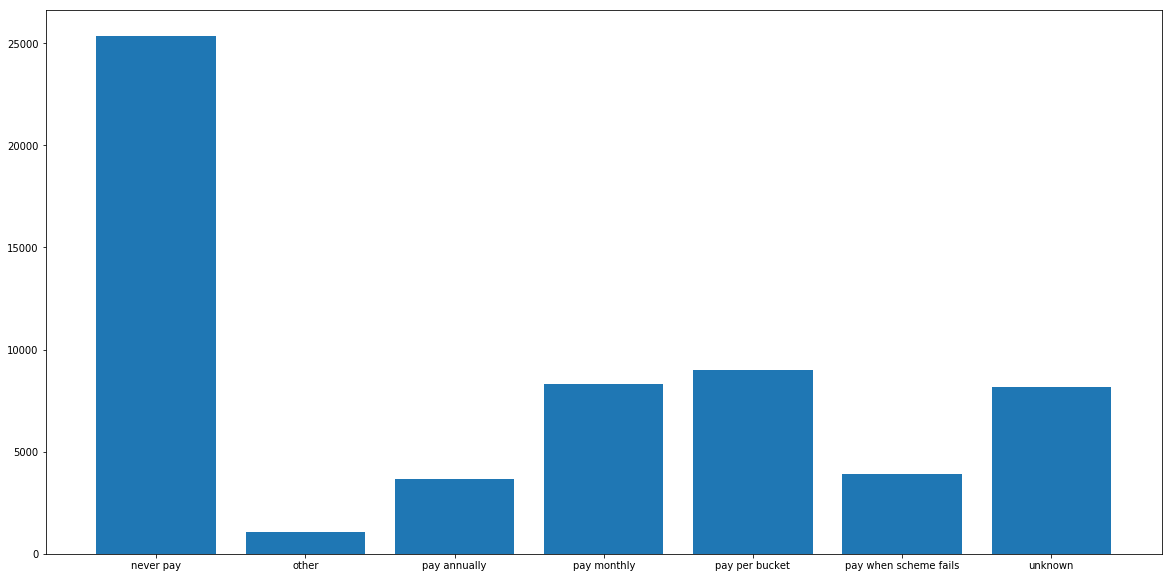

In [91]:
bar_plot(train_data.payment)

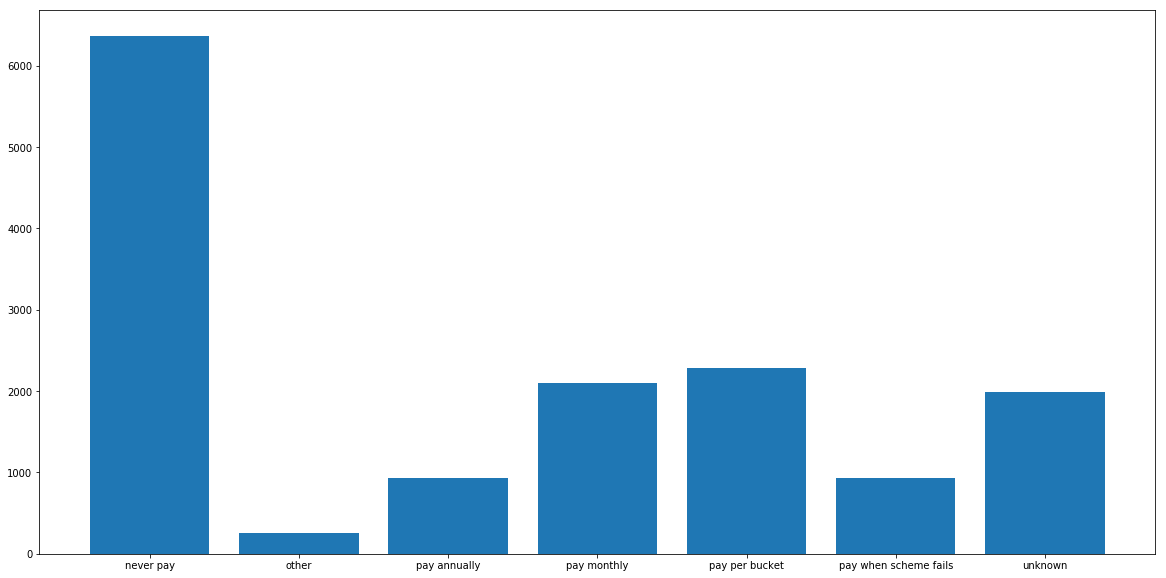

In [92]:
bar_plot(test_data.payment)

## EDA - 31 - 40 variables

In [93]:
train_data.iloc[:, 30:40].describe(include = 'all')

,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,59400,59400,59400,59400,59400,59400,59400,59400,59400,59400
unique,7,8,6,5,5,10,7,3,7,6
top,never pay,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
freq,25348,50818,50818,33186,33186,17021,17021,45794,28522,34625


In [94]:
test_data.iloc[:, 30:40].describe(include = 'all')

,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
count,14850,14850,14850,14850,14850,14850,14850,14850,14850,14850
unique,7,8,6,5,5,10,7,3,7,6
top,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,communal standpipe,communal standpipe
freq,6364,12687,12687,8336,8336,4316,4316,11492,7106,8614


### `payment_type`

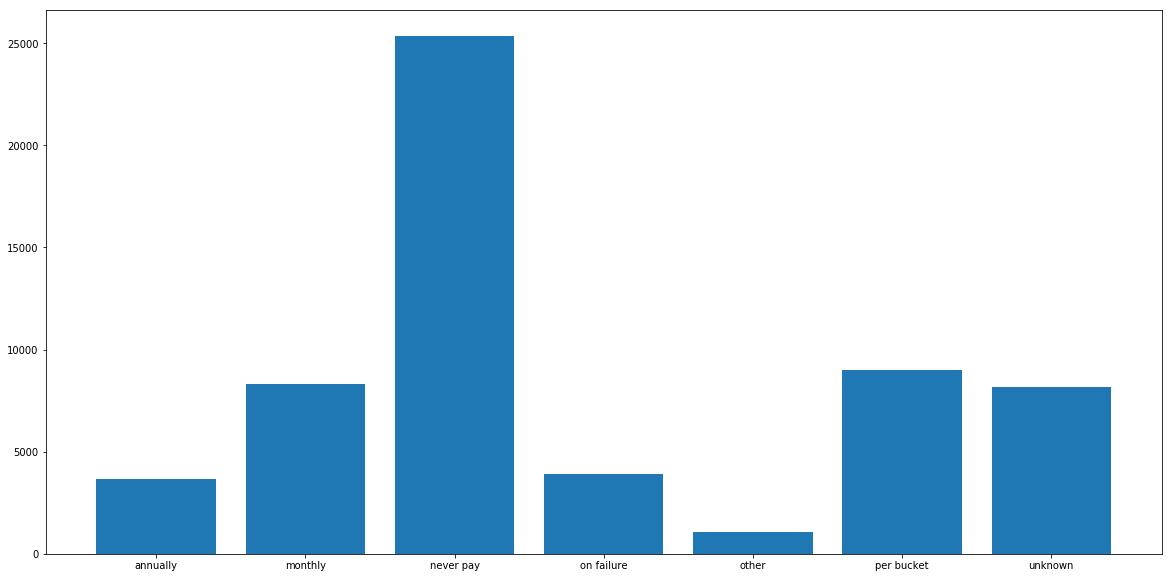

In [95]:
bar_plot(train_data.payment_type)

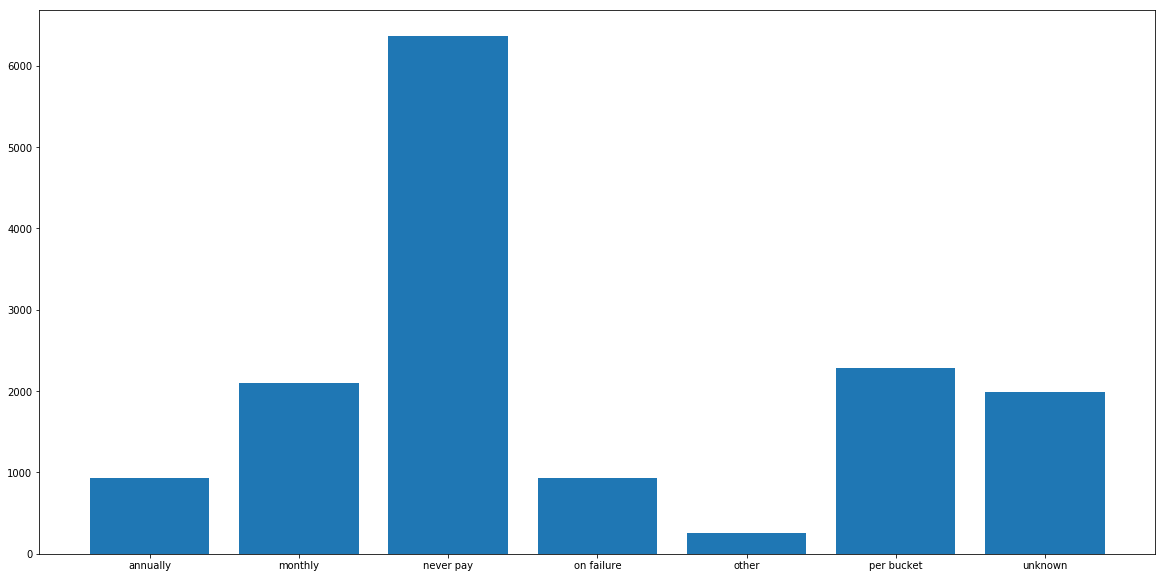

In [96]:
bar_plot(test_data.payment_type)

### `water_quality`

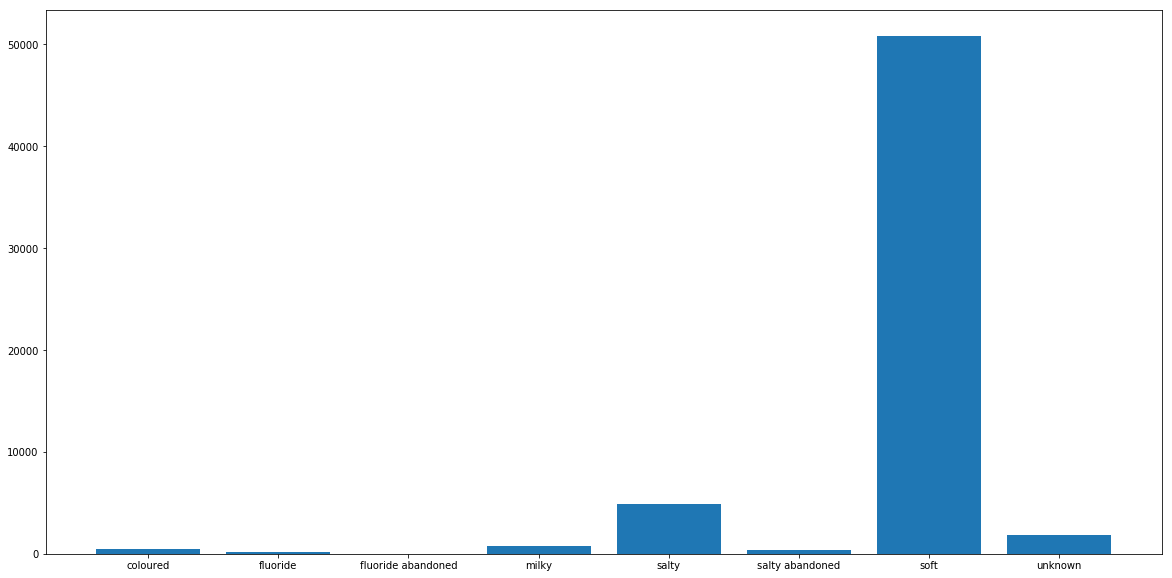

In [97]:
bar_plot(train_data.water_quality)

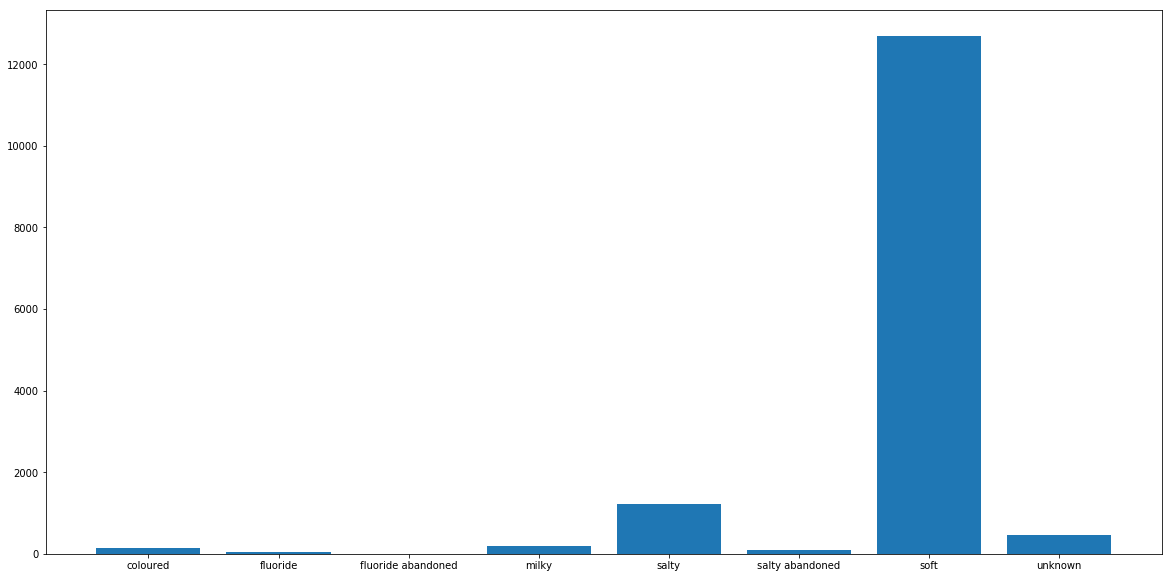

In [98]:
bar_plot(test_data.water_quality)

### `quality_group`

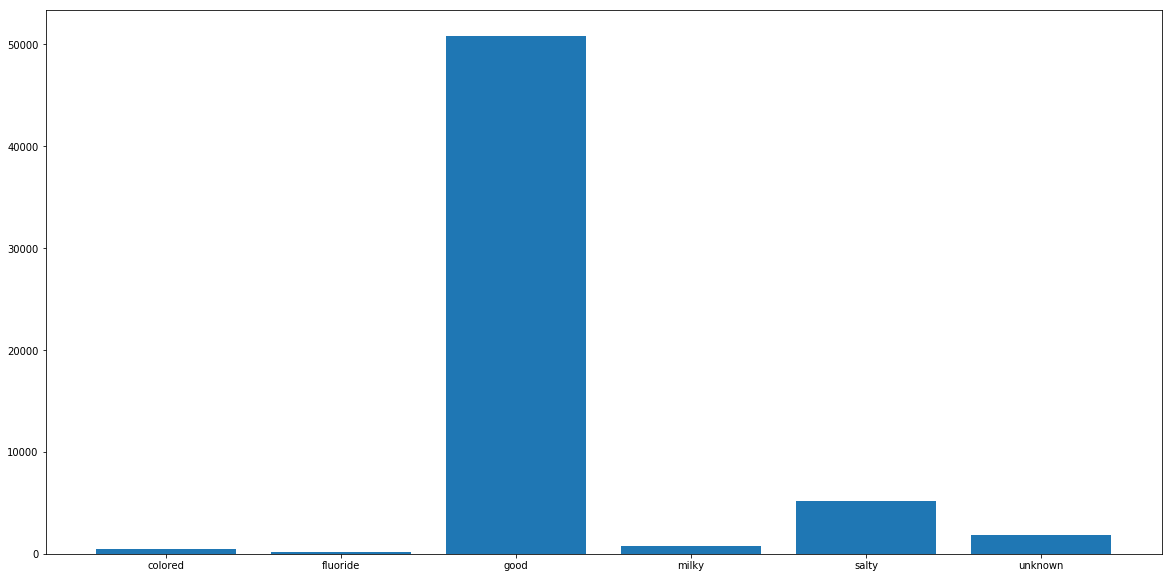

In [99]:
bar_plot(train_data.quality_group)

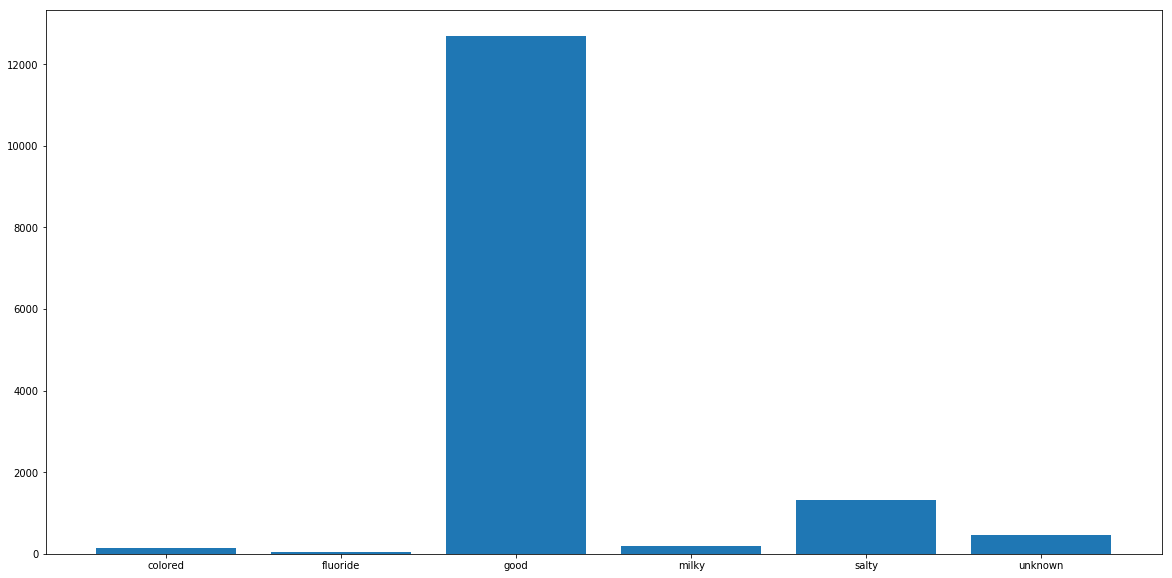

In [100]:
bar_plot(test_data.quality_group)

### `quanity`

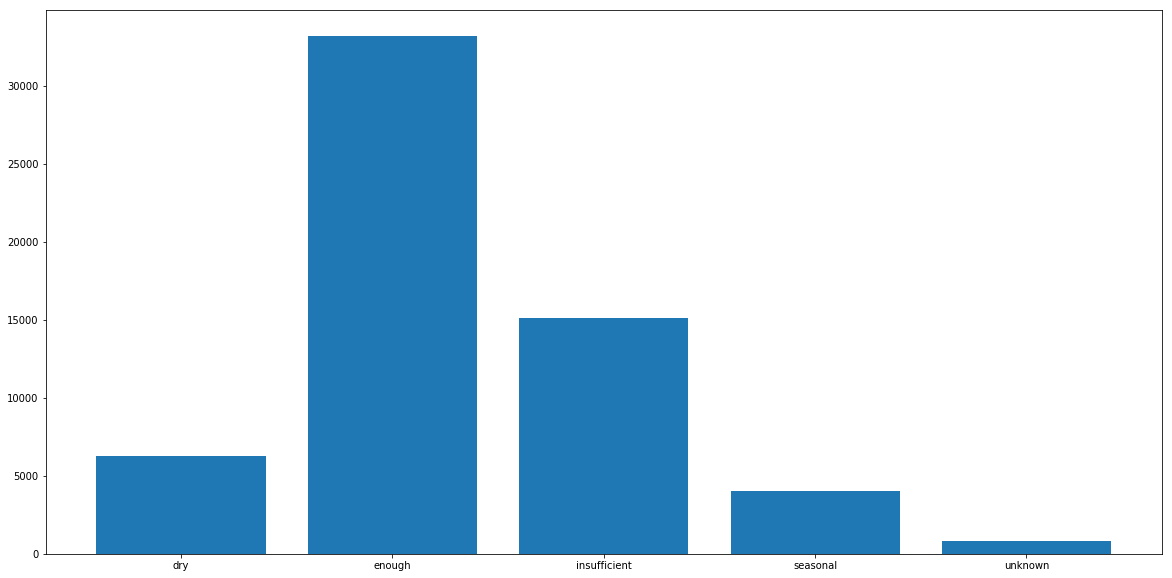

In [102]:
bar_plot(train_data.quantity)

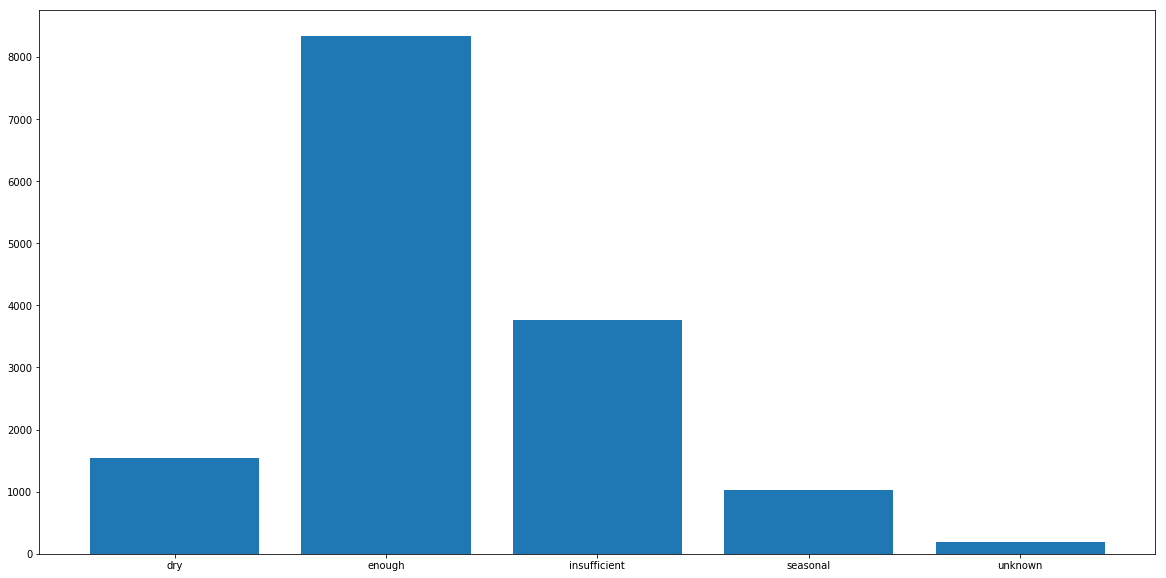

In [103]:
bar_plot(test_data.quantity)

### `quantity_group`

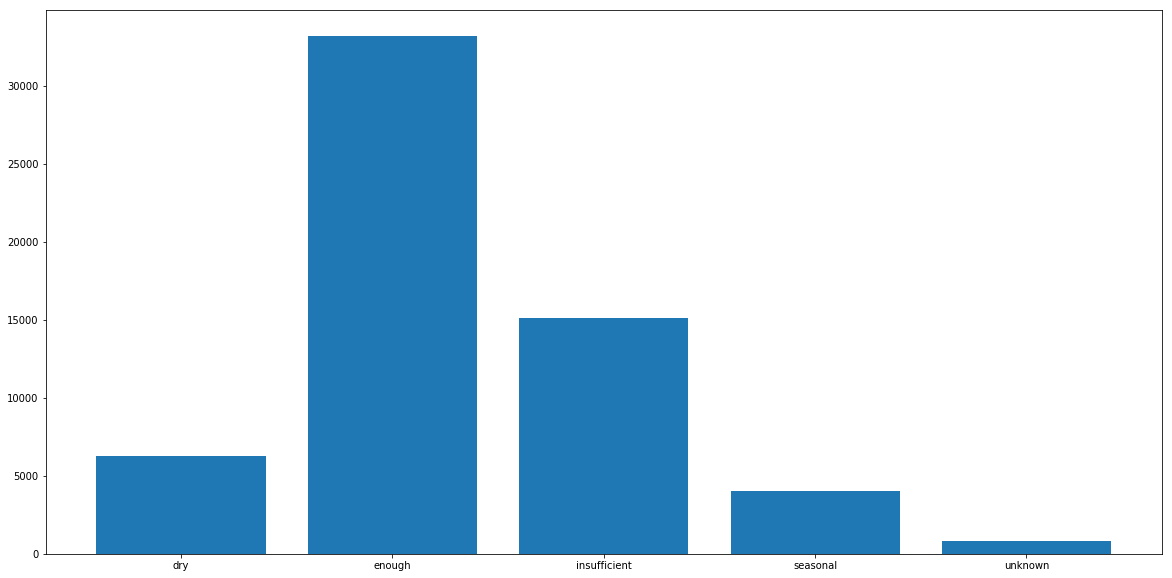

In [105]:
bar_plot(train_data.quantity_group)

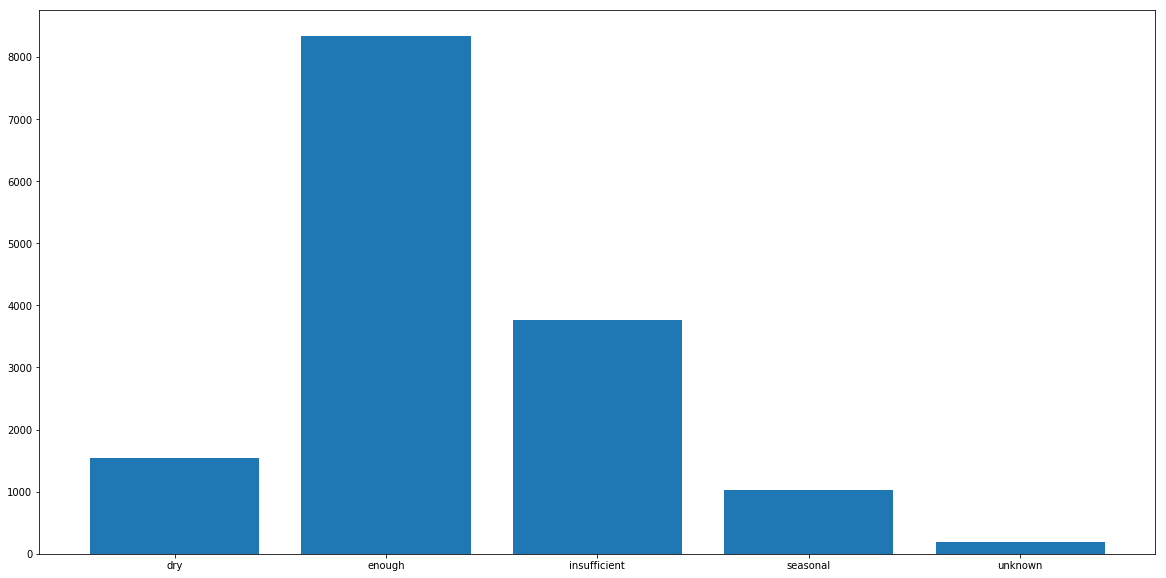

In [106]:
bar_plot(test_data.quantity_group)

### `source`

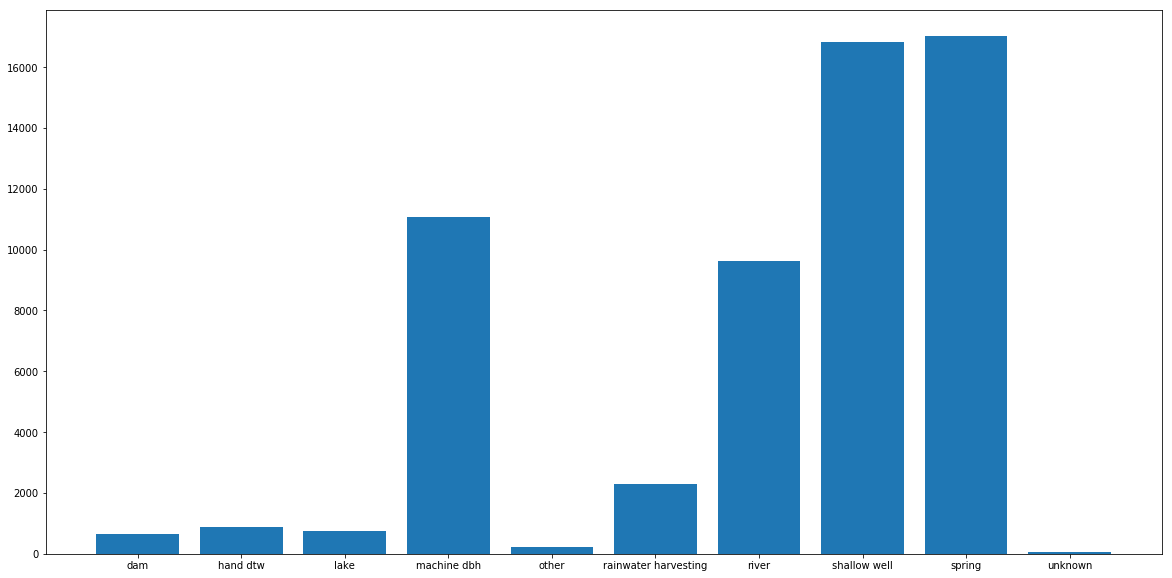

In [107]:
bar_plot(train_data.source)

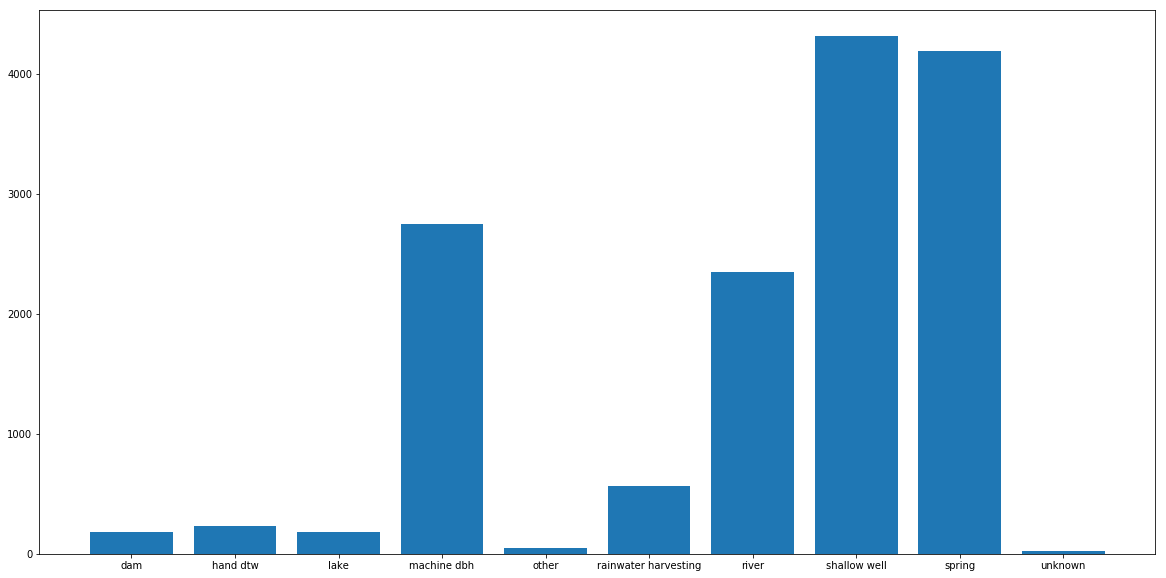

In [108]:
bar_plot(test_data.source)

### `source_type`

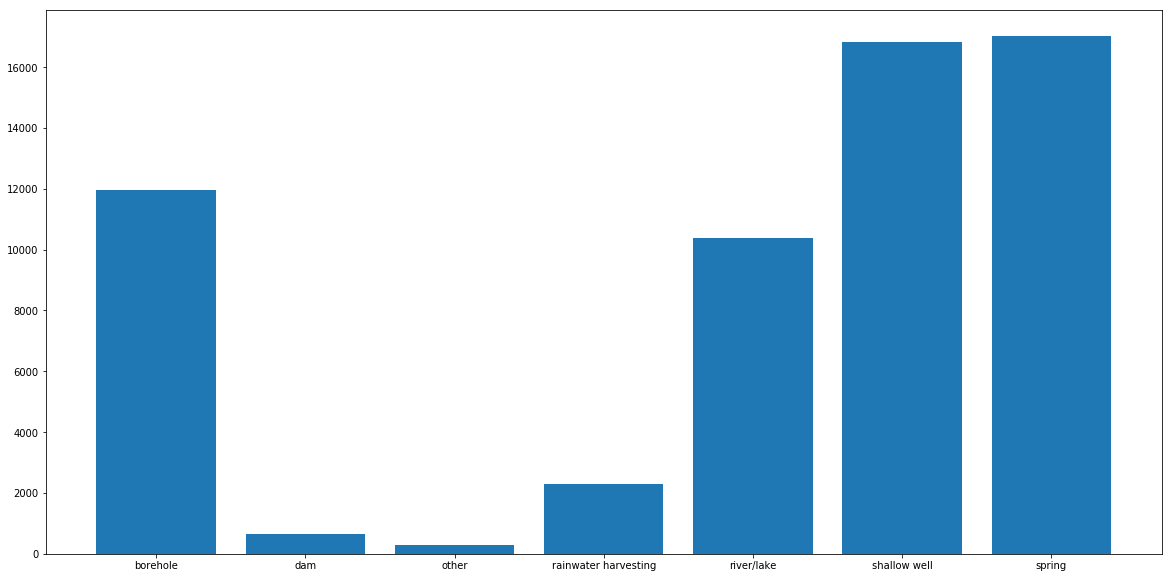

In [109]:
bar_plot(train_data.source_type)

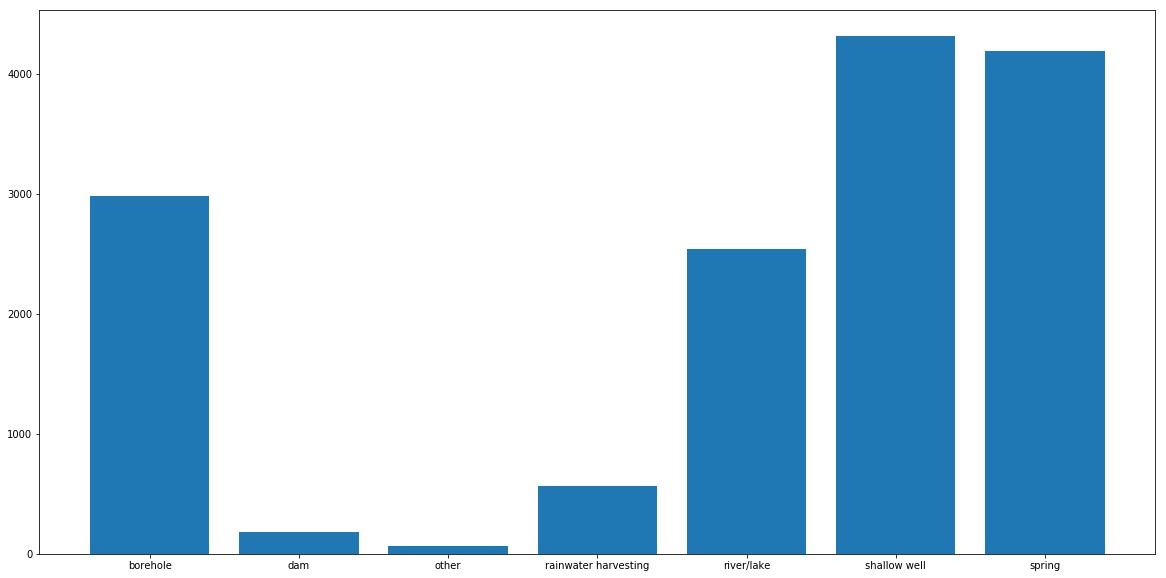

In [110]:
bar_plot(test_data.source_type)

### `source_class`

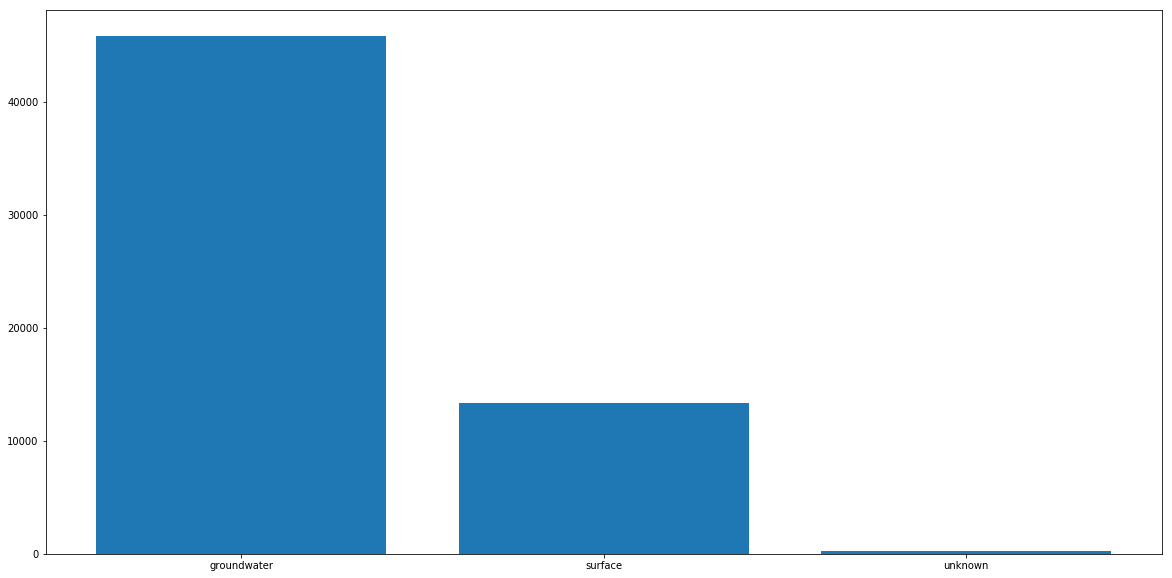

In [111]:
bar_plot(train_data.source_class)

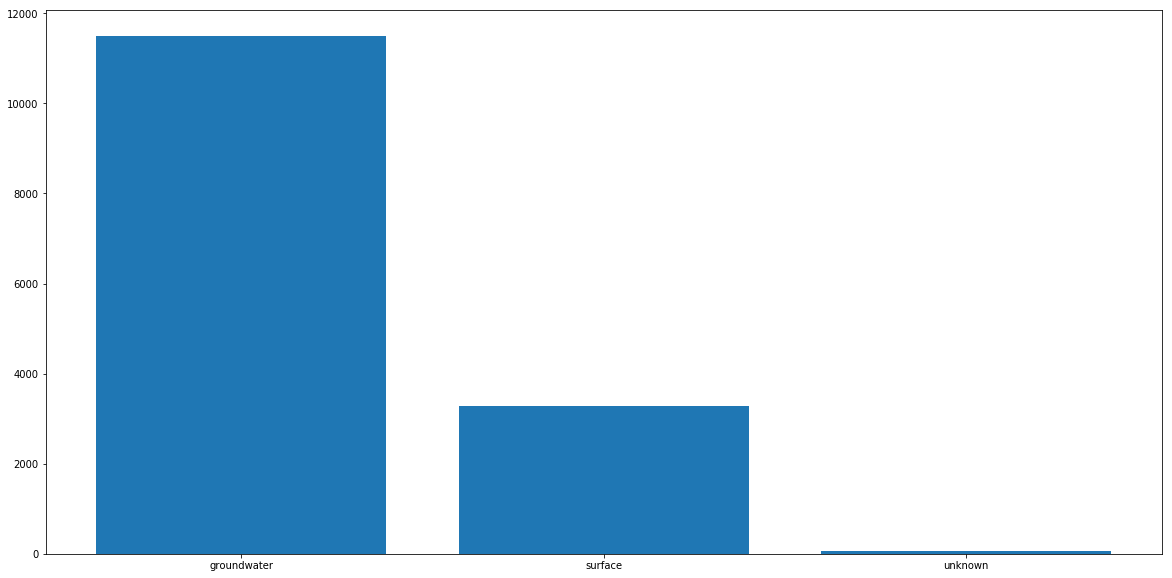

In [112]:
bar_plot(test_data.source_class)

### `waterpoint_type`

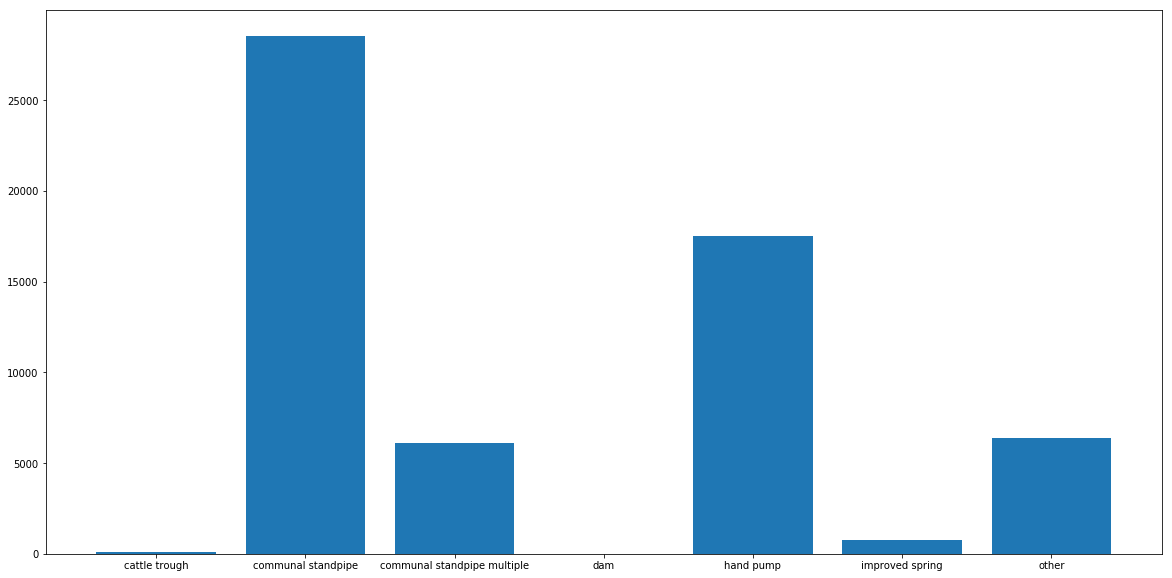

In [113]:
bar_plot(train_data.waterpoint_type)

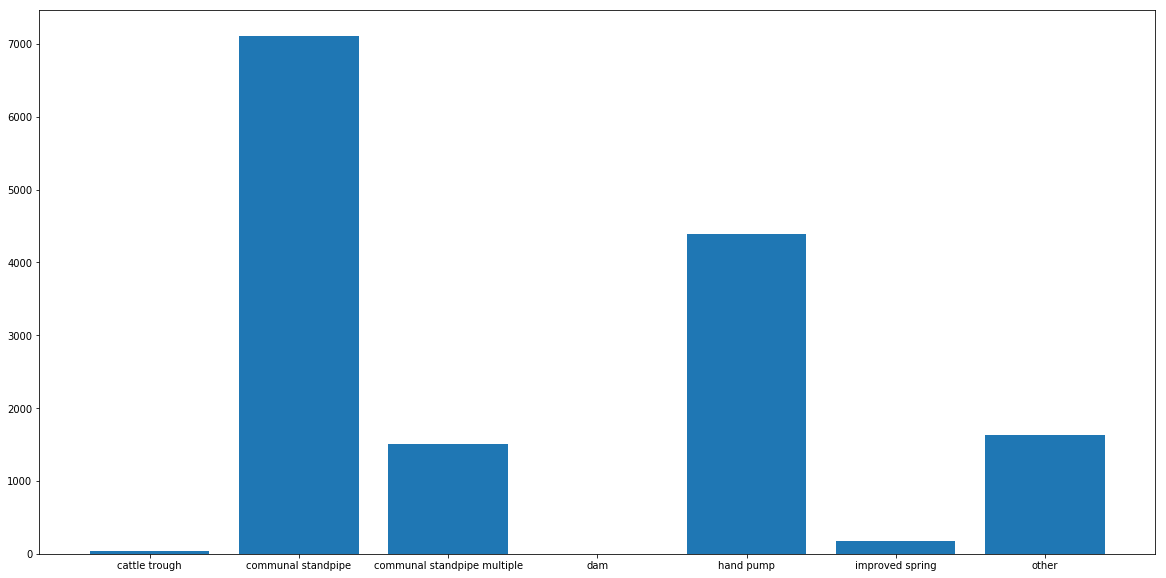

In [114]:
bar_plot(test_data.waterpoint_type)

### `waterpoint_type_group`

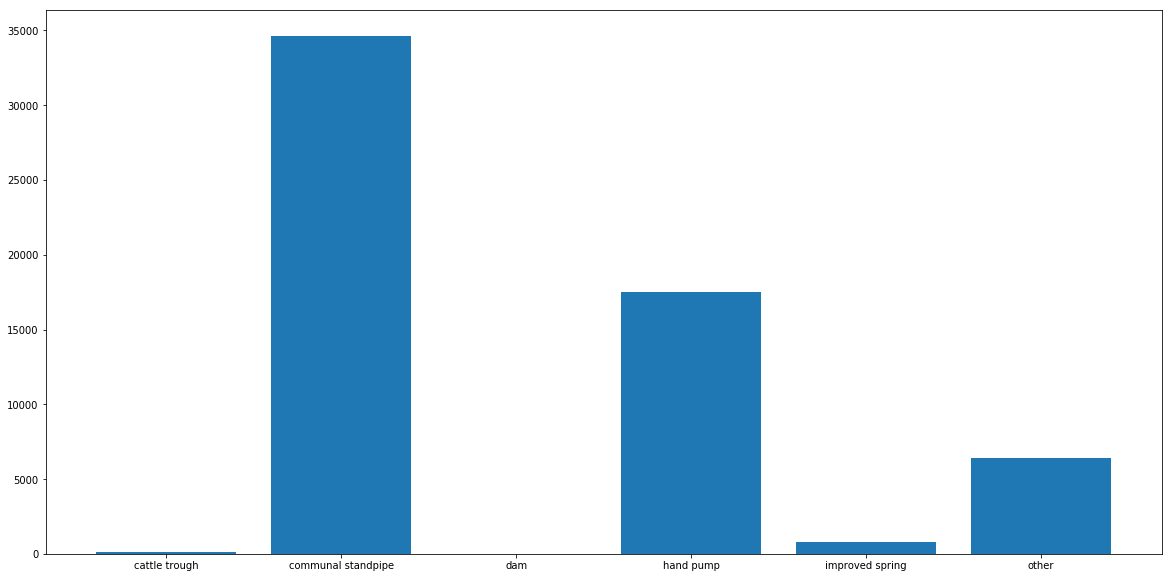

In [115]:
bar_plot(train_data.waterpoint_type_group)

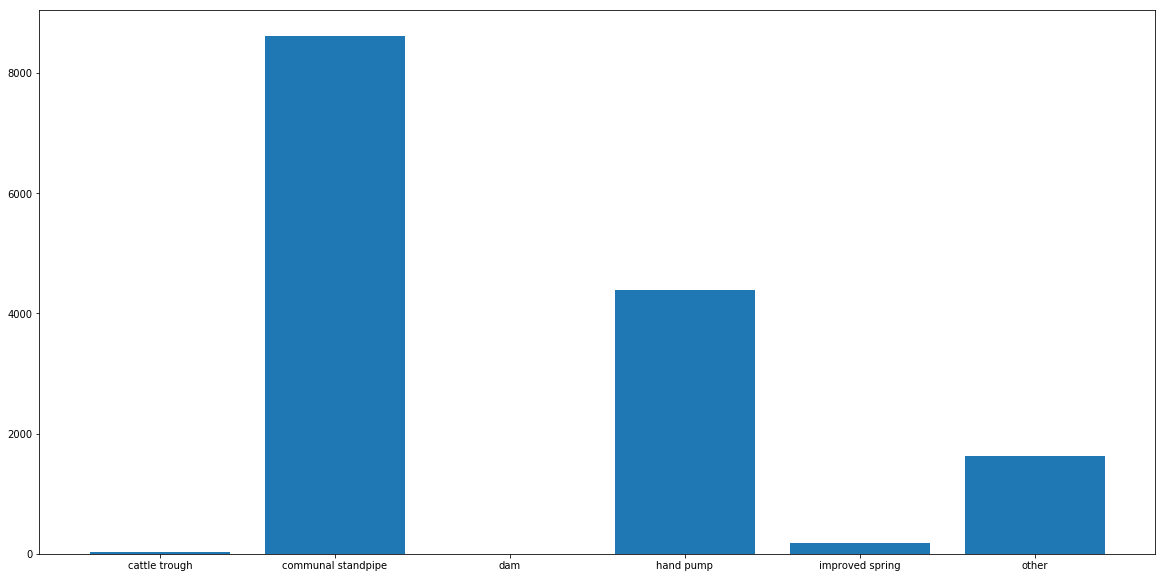

In [116]:
bar_plot(test_data.waterpoint_type_group)